# **Personal Portfolio Optimization**

In [ ]:
# TODO Create specific table of contents

# **I) Initial Data for Portfolios**

In [ ]:
# Importing data analysis packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fmgr

# Importing datetime package to utilize datetime datatypes and datetime calculations
import datetime as dt

# Importing random package for random value generation
import random

# Importing warnings package to ignore unnecessary warnings for some plotting outputs
import warnings
warnings.filterwarnings('ignore')

# To display multiple tables in a single output
from IPython.display import display, HTML

CSS = '''.output {flex-direction: row;}'''
HTML('<style>{}</style>'.format(CSS))

# Keeping plots embedded within our Jupyter Notebook
%matplotlib inline

# Importing dark theme for data visualizations
__import__ ('jupyterthemes').jtplot.style()

# Changing formatting for floats to suppress scientific notation
pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [ ]:
# Setting dates for our stocks data
st_start_date = '2021-07-01'
st_end_date = '2022-07-01'
# End date must be on a weekday (since the stock market is only open M-F)

# Setting our list of variables for our stock portfolio list
AMD = pdr.DataReader('AMD', 'yahoo', st_start_date, st_end_date)
AAPL = pdr.DataReader('AAPL', 'yahoo', st_start_date, st_end_date)
MSFT = pdr.DataReader('MSFT', 'yahoo', st_start_date, st_end_date)
ORCL = pdr.DataReader('ORCL', 'yahoo', st_start_date, st_end_date)
TSLA = pdr.DataReader('TSLA', 'yahoo', st_start_date, st_end_date)
AMZN = pdr.DataReader('AMZN', 'yahoo', st_start_date, st_end_date)
GOOG = pdr.DataReader('GOOG', 'yahoo', st_start_date, st_end_date)
META = pdr.DataReader('META', 'yahoo', st_start_date, st_end_date)

In [ ]:
# Setting dates for our crypto data
cr_start_date = '2021-07-01'
cr_end_date = '2022-06-30'
# End date must be on 2022-06-30 instead of 2022-07-01 due to the crypto market's offset (since the crypto market runs 24/7, not only M-F)

# Setting our list of variables for our crypto portfolio list
BTC = pdr.DataReader('BTC-USD', 'yahoo', cr_start_date, cr_end_date)
ETH = pdr.DataReader('ETH-USD', 'yahoo', cr_start_date, cr_end_date)
ADA = pdr.DataReader('ADA-USD', 'yahoo', cr_start_date, cr_end_date)
SOL = pdr.DataReader('SOL-USD', 'yahoo', cr_start_date, cr_end_date)
MATIC = pdr.DataReader('MATIC-USD', 'yahoo', cr_start_date, cr_end_date)
MANA = pdr.DataReader('MANA-USD', 'yahoo', cr_start_date, cr_end_date)
ENJ = pdr.DataReader('ENJ-USD', 'yahoo', cr_start_date, cr_end_date)
VET = pdr.DataReader('VET-USD', 'yahoo', cr_start_date, cr_end_date)

In [ ]:
# Setting our index dates to mirror our stock dates (we can easily edit our index dates from here without affecting our stock portfolio dates)
ind_start_date = st_start_date
ind_end_date = st_end_date

# Setting our list of variables for our index portfolio list
SPY = pdr.DataReader('^GSPC', 'yahoo', ind_start_date, ind_end_date)
NASDAQ = pdr.DataReader('^IXIC', 'yahoo', ind_start_date, ind_end_date)
DOWJ = pdr.DataReader('^DJI', 'yahoo', ind_start_date, ind_end_date)

In [ ]:
# Creating lists of our stocks and cryptos to analyze
st_portfolio_list = [AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META]
cr_portfolio_list = [BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET]

# Creating list of indexes to view for comparison
ind_portfolio_list = [SPY, NASDAQ, DOWJ]

In [ ]:
# Examining the initial data from a random asset in each portfolio
display(
    GOOG.head(),
    ETH.head(),
    SPY.head()
)

# **II) Calculating Performance Metrics & Plotting** <a class="anchor" id="II"></a>

In [ ]:
# Adding a Normalizing Return column per investment in each portfolio list, which shows us the value of each investment compared to the initial date that we bought it
for stock in st_portfolio_list:
    stock['Normalizing Return'] = stock['Adj Close']/stock.iloc[0]['Adj Close']

for crypto in cr_portfolio_list:
    crypto['Normalizing Return'] = crypto['Adj Close']/crypto.iloc[0]['Adj Close']

for index in ind_portfolio_list:
    index['Normalizing Return'] = index['Adj Close']/index.iloc[0]['Adj Close']

In [ ]:
# Efficiently checking if our new column was added correctly per dataframe
print(
    'Shape of Stock Dataframe:', stock.shape,
    '\nShape of Crypto Dataframe:', crypto.shape,
    '\nShape of Index Dataframe:', index.shape
)

In [ ]:
# Checking that our new column is working correctly
TSLA.head()

In [ ]:
# Creating lists of evenly distributed allocation values per portfolio
st_allo_values = [1/len(st_portfolio_list)] * len(st_portfolio_list)
cr_allo_values = [1/len(cr_portfolio_list)] * len(cr_portfolio_list)
ind_allo_values = [1/len(ind_portfolio_list)] * len(ind_portfolio_list)

display(
    st_allo_values,
    cr_allo_values,
    ind_allo_values
)

In [ ]:
# Allocating equal weights per stock / crypto / index in our portfolio lists using the zip function
for stock, allo in zip((st_portfolio_list), st_allo_values):
    stock ['Allocation'] = stock['Normalizing Return'] * allo

for crypto, allo in zip((cr_portfolio_list), cr_allo_values):
    crypto ['Allocation'] = crypto['Normalizing Return'] * allo

for index, allo in zip((ind_portfolio_list), ind_allo_values):
    index ['Allocation'] = index['Normalizing Return'] * allo

In [ ]:
# Defining functions to quickly view heads or tails of random assets from portfolios

# Function to view one random asset from all portfolios
def view_rand_assets(s_head, s_tail=None):
    if s_head > 0:
        return display(
                    st_portfolio_list[np.random.randint(len(st_portfolio_list))].head(s_head), \
                    cr_portfolio_list[np.random.randint(len(cr_portfolio_list))].head(s_head), \
                    ind_portfolio_list[np.random.randint(len(ind_portfolio_list))].head(s_head)
                )
    else:
        return display(
                    st_portfolio_list[np.random.randint(len(st_portfolio_list))].tail(s_tail), \
                    cr_portfolio_list[np.random.randint(len(cr_portfolio_list))].tail(s_tail), \
                    ind_portfolio_list[np.random.randint(len(ind_portfolio_list))].tail(s_tail)
                )

# Function to view one random asset for one specific portfolio
def view_1_rand_asset(portf, s_head=None, s_tail=None):
    if portf == 'st' and s_head > 0:
        return st_portfolio_list[np.random.randint(len(st_portfolio_list))].head(s_head)
    elif portf == 'st' and s_head == 0:
        return st_portfolio_list[np.random.randint(len(st_portfolio_list))].tail(s_tail)
    if portf == 'cr' and s_head > 0:
        return cr_portfolio_list[np.random.randint(len(cr_portfolio_list))].head(s_head)
    elif portf == 'cr' and s_head == 0:
        return cr_portfolio_list[np.random.randint(len(cr_portfolio_list))].tail(s_tail)
    if portf == 'ind' and s_head > 0:
        return ind_portfolio_list[np.random.randint(len(st_portfolio_list))].head(s_head)
    elif portf == 'ind' and s_head == 0:
        return ind_portfolio_list[np.random.randint(len(ind_portfolio_list))].tail(s_tail)

In [ ]:
# Examining various allocations for random items within our portfolio lists
view_rand_assets(3)

In [ ]:
# Assigning a total value of $150,000 to each portfolio
portfolio_value = 150000

# Assigning evenly distributed position values per stock
for stock in st_portfolio_list:
    stock['Position Value'] = stock['Allocation'] * portfolio_value

# Assigning evenly distributed position values per crypto
for crypto in cr_portfolio_list:
    crypto['Position Value'] = crypto['Allocation'] * portfolio_value

# Assigning evenly distributed position values per index
for etf in ind_portfolio_list:
    etf['Position Value'] = etf['Allocation'] * portfolio_value

In [ ]:
# Examining multiple heads and position values
view_rand_assets(3)

In [ ]:
# Creating new dataframes of all position values to analyze and plot each portfolio's movements over time (and the movements of each individual investment within each portfolio)
st_position_values = list()
for i in range(len(st_portfolio_list)):
    st_position_values.append(st_portfolio_list[i]['Position Value'])

cr_position_values = list()
for i in range(len(cr_portfolio_list)):
    cr_position_values.append(cr_portfolio_list[i]['Position Value'])

ind_position_values = list()
for i in range(len(ind_portfolio_list)):
    ind_position_values.append(ind_portfolio_list[i]['Position Value'])

# Concatenating the list of all position values to a single dataframe per portfolio
st_position_values = pd.concat(st_position_values, axis = 1)
cr_position_values = pd.concat(cr_position_values, axis = 1)
ind_position_values = pd.concat(ind_position_values, axis = 1)

# Naming all columns with their respective names per portfolio
st_position_values.columns = ['AMD','AAPL','MSFT','ORCL','TSLA','AMZN','GOOG','META']
cr_position_values.columns = ['BTC','ETH','ADA','SOL','MATIC','MANA','ENJ','VET']
ind_position_values.columns = ['SPY', 'NASDAQ', 'DOWJ']

# Adding a total column to examine total portfolio values over time
st_position_values['Total'] = st_position_values.sum(axis = 1)
cr_position_values['Total'] = cr_position_values.sum(axis = 1)
ind_position_values['Total'] = ind_position_values.sum(axis = 1)

display(
    st_position_values.head(3),
    cr_position_values.head(3),
    ind_position_values.head(3)
)

In [ ]:
# Defining function to create a standard format for plotting and outputs of each portfolio and their individual assets
def plot_performance(portf, asset=None):

# Custom plotting and output format for stocks
    if portf == 'st' and asset == 'Total':
        fig, ax = plt.subplots(figsize=(26,12))
        g = sns.lineplot(data=st_position_values[asset], color='b');
        g.set_title('Performance of '+asset+' Stock Portfolio Over Time')
        g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
        g.set_ylabel('')
        g.set_xlabel('');

        print(
            '** VALUES FOR STOCK PORTFOLIO **\n---',
            '\nTotal Portfolio Value at High = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                st_position_values[asset].max(),
                ((st_position_values[asset].max() / st_position_values[asset][0]))*100,
                st_position_values[asset][0]
            ),
            '\nCurrent Portfolio Value = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                st_position_values[asset][-1],
                ((st_position_values[asset][-1] / st_position_values[asset][0])-1)*100,
                st_position_values[asset][0]
            ),
            '\nChange of Portfolio Value Since High = ${:,.2f} ({:+,.2f}% from High of ${:,.2f})'.
            format(
                st_position_values[asset][-1] - st_position_values[asset].max(),
                ((st_position_values[asset][-1] / st_position_values[asset].max())-1)*100,
                st_position_values[asset].max()
            ),
        )

    elif portf == 'st' and asset != 'Total':
        fig, ax = plt.subplots(figsize=(26,12))
        g = sns.lineplot(data=st_position_values[asset], color='b');
        g.set_title('Performance of '+asset+' Position Over Time')
        g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
        g.set_ylabel('')
        g.set_xlabel('');

        print(
            'Total Value of '+asset+' Position at High = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                st_position_values[asset].max(),
                ((st_position_values[asset].max() / st_position_values[asset][0]))*100,
                st_position_values[asset][0]
            ),
            '\nCurrent Value of '+asset+' Position = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                st_position_values[asset][-1],
                ((st_position_values[asset][-1] / st_position_values[asset][0])-1)*100,
                st_position_values[asset][0]
            ),
            '\nChange of Current '+asset+' Position Since High = ${:,.2f} ({:+,.2f}% from High of ${:,.0f})'.
            format(
                st_position_values[asset][-1] - st_position_values[asset].max(),
                ((st_position_values[asset][-1] / st_position_values[asset].max())-1)*100,
                st_position_values[asset].max()
            ),
        )

# Custom plotting and output format for cryptos
    if portf == 'cr' and asset == 'Total':
        fig, ax = plt.subplots(figsize=(26,12))
        g = sns.lineplot(data=cr_position_values[asset], color='g');
        g.set_title('Performance of '+asset+' Crypto Portfolio Over Time')
        g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
        g.set_ylabel('')
        g.set_xlabel('');

        print(
            '** VALUES FOR CRYPTO PORTFOLIO **\n---',
            '\nTotal Portfolio Value at High = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                cr_position_values[asset].max(),
                ((cr_position_values[asset].max() / cr_position_values[asset][0]))*100,
                cr_position_values[asset][0]
            ),
            '\nCurrent Portfolio Value = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                cr_position_values[asset][-1],
                ((cr_position_values[asset][-1] / cr_position_values[asset][0])-1)*100,
                cr_position_values[asset][0]
            ),
            '\nChange of Portfolio Value Since High = ${:,.2f} ({:+,.2f}% from High of ${:,.2f})'.
            format(
                cr_position_values[asset][-1] - cr_position_values[asset].max(),
                ((cr_position_values[asset][-1] / cr_position_values[asset].max())-1)*100,
                cr_position_values[asset].max()
            ),
        )

    elif portf == 'cr' and asset != 'Total':
        fig, ax = plt.subplots(figsize=(26,12))
        g = sns.lineplot(data=cr_position_values[asset], color='g');
        g.set_title('Performance of '+asset+' Position Over Time')
        g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
        g.set_ylabel('')
        g.set_xlabel('');

        print(
            'Total Value of '+asset+' Position at High = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                cr_position_values[asset].max(),
                ((cr_position_values[asset].max() / cr_position_values[asset][0]))*100,
                cr_position_values[asset][0]
            ),
            '\nCurrent Value of '+asset+' Position = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                cr_position_values[asset][-1],
                ((cr_position_values[asset][-1] / cr_position_values[asset][0])-1)*100,
                cr_position_values[asset][0]
            ),
            '\nChange of Current '+asset+' Position Since High = ${:,.2f} ({:+,.2f}% from High of ${:,.2f})'.
            format(
                cr_position_values[asset][-1] - cr_position_values[asset].max(),
                ((cr_position_values[asset][-1] / cr_position_values[asset].max())-1)*100,
                cr_position_values[asset].max()
            ),
        )

# Custom plotting and output format for indexes
    if portf == 'ind' and asset == 'Total':
        fig, ax = plt.subplots(figsize=(26,12))
        g = sns.lineplot(data=ind_position_values[asset], color='r');
        g.set_title('Performance of '+asset+' Index Portfolio Over Time')
        g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
        g.set_ylabel('')
        g.set_xlabel('');

        print(
            '** VALUES FOR INDEX PORTFOLIO **\n---',
            '\nTotal Portfolio Value at High = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                ind_position_values[asset].max(),
                ((ind_position_values[asset].max() / ind_position_values[asset][0]))*100,
                ind_position_values[asset][0]
            ),
            '\nCurrent Portfolio Value = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                ind_position_values[asset][-1],
                ((ind_position_values[asset][-1] / ind_position_values[asset][0])-1)*100,
                ind_position_values[asset][0]
            ),
            '\nChange of Portfolio Value Since High = ${:,.2f} ({:+,.2f}% from High of ${:,.2f})'.
            format(
                ind_position_values[asset][-1] - ind_position_values[asset].max(),
                ((ind_position_values[asset][-1] / ind_position_values[asset].max())-1)*100,
                ind_position_values[asset].max()
            ),
        )

    elif portf == 'ind' and asset != 'Total':
        fig, ax = plt.subplots(figsize=(26,12))
        g = sns.lineplot(data=ind_position_values[asset], color='r');
        g.set_title('Performance of '+asset+' Position Over Time')
        g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
        g.set_ylabel('')
        g.set_xlabel('');

        print(
            'Total Value of '+asset+' Position at High = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                ind_position_values[asset].max(),
                ((ind_position_values[asset].max() / ind_position_values[asset][0]))*100,
                ind_position_values[asset][0]
            ),
            '\nCurrent Value of '+asset+' Position = ${:,.2f} ({:+,.2f}% from Initial Investment of ${:,.0f})'.
            format(
                ind_position_values[asset][-1],
                ((ind_position_values[asset][-1] / ind_position_values[asset][0])-1)*100,
                ind_position_values[asset][0]
            ),
            '\nChange of Current '+asset+' Position Since High = ${:,.2f} ({:+,.2f}% from High of ${:,.2f})'.
            format(
                ind_position_values[asset][-1] - ind_position_values[asset].max(),
                ((ind_position_values[asset][-1] / ind_position_values[asset].max())-1)*100,
                ind_position_values[asset].max()
            ),
        )

In [ ]:
# Examining performance of our total stock portfolio
plot_performance('st', 'Total')

In [ ]:
# Examining performance of our total crypto portfolio
plot_performance('cr', 'Total')

In [ ]:
# Examining performance of our total index portfolio
plot_performance('ind', 'Total')

In [ ]:
# Overlaying plots of total performance for each portfolio

fig, ax = plt.subplots(figsize=(26,12))

sns.set_context('poster')

g = sns.lineplot(data=st_position_values['Total'], color='b');      # Blue
g = sns.lineplot(data=cr_position_values['Total'], color='g');      # Green
g = sns.lineplot(data=ind_position_values['Total'], color='r');     # Red

g.set_title('Performance of All Portfolios Over Time')
g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
g.set_ylabel('')
g.set_xlabel('');

### Setting Profit Targets & Analyzing Portfolio Performance

In [ ]:
# Setting targeted profit margin for our portfolio and individual asset types
target_portf_profit_pct = 0.15

target_st_profit_pct = 0.30
target_cr_profit_pct = 0.50
target_ind_profit_pct = 0.08

target_portf_profit_margin = portfolio_value * (1+target_portf_profit_pct)

# Asset profit target for individual assets
target_indv_st_profit_margin = (st_allo_values[0]*portfolio_value)* (1+target_st_profit_pct)
target_indv_cr_profit_margin = (cr_allo_values[0]*portfolio_value)* (1+target_cr_profit_pct)
target_indv_ind_profit_margin = (ind_allo_values[0]*portfolio_value)* (1+target_ind_profit_pct)

print(
    '** TARGETED PROFIT MARGINS ** \n---',
        '\nFor portfolio: \n    {:+,.2f}% (${:+,.0f}) \n Targeted portfolio value = ${:,.0f}'.
    format(
        ((target_portf_profit_margin / portfolio_value)-1)*100,
        target_portf_profit_margin - portfolio_value,
        target_portf_profit_margin
    ),
        '\n\nPer stock: \n    {:+,.2f}% (${:+,.0f}) \n Targeted take-profit position value = ${:,.0f}'.
    format(
        ((((st_allo_values[0]*portfolio_value) * (1+target_st_profit_pct)) / (st_allo_values[0]*portfolio_value))-1)*100,
        ((st_allo_values[0]*portfolio_value) * (1+target_st_profit_pct)) - (st_allo_values[0]*portfolio_value),
        target_indv_st_profit_margin
    ),
        '\n\nPer crypto: \n   {:+,.2f}% (${:+,.0f}) \n Targeted take-profit position value = ${:,.0f}'.
    format(
        ((((cr_allo_values[0]*portfolio_value) * (1+target_cr_profit_pct)) / (cr_allo_values[0]*portfolio_value))-1)*100,
        ((cr_allo_values[0]*portfolio_value) * (1+target_cr_profit_pct)) - (cr_allo_values[0]*portfolio_value),
        target_indv_cr_profit_margin
    ),
        '\n\nPer index: \n    {:+,.2f}% (${:+,.0f}) \n Targeted take-profit position value = ${:,.0f}'.
    format(
        ((((ind_allo_values[0]*portfolio_value) * (1+target_ind_profit_pct)) / (ind_allo_values[0]*portfolio_value))-1)*100,
        ((ind_allo_values[0]*portfolio_value) * (1+target_ind_profit_pct)) - (ind_allo_values[0]*portfolio_value),
        target_indv_ind_profit_margin
    )
)

In [ ]:
# Creating variables to hold initial values per asset type
init_st_value = st_allo_values[0]*portfolio_value
init_cr_value = cr_allo_values[0]*portfolio_value
init_ind_value = ind_allo_values[0]*portfolio_value

init_st_value, init_cr_value, init_ind_value

In [ ]:
# Defining function to choose portfolio for analysis of performance within upper and lower bounds
def portfolio_selection (portf):
    return (
        portf.index,
        portf['Total'],
        np.ma.masked_where(portf['Total'] < upper_bound, portf['Total']),
        np.ma.masked_where(portf['Total'] > lower_bound, portf['Total']),
        np.ma.masked_where((portf['Total'] < lower_bound) | (portf['Total'] > upper_bound), portf['Total'])
    )

upper_bound = target_portf_profit_margin
lower_bound = portfolio_value

# Plotting portfolio performance relevant to our targeted profit margin
(date_range, performance, performance_upper, performance_lower, performance_middle) = portfolio_selection(cr_position_values)

fig, ax = plt.subplots(figsize=(26,12))
ax.plot(date_range, performance_middle, 'b', date_range, performance_lower, 'r', date_range, performance_upper, 'g');

In [ ]:
# Setting custom upper and lower bounds per asset type
st_upper_bound = target_indv_st_profit_margin
st_lower_bound = init_st_value

cr_upper_bound = target_indv_cr_profit_margin
cr_lower_bound = init_cr_value

ind_upper_bound = target_indv_ind_profit_margin
ind_lower_bound = init_ind_value

# Defining function to analyze individual asset performance within custom upper and lower bounds
def asset_selection (portf, asset):
    if portf == 'st':
        fig, ax = plt.subplots(figsize=(26,12))
        ax.plot(date_range, performance_middle, 'b', date_range, performance_lower, 'r', date_range, performance_upper, 'g');
        return (
            st_position_values.index,
            st_position_values[asset],
            np.ma.masked_where(st_position_values[asset] < st_upper_bound, st_position_values[asset]),
            np.ma.masked_where(st_position_values[asset] > st_lower_bound, st_position_values[asset]),
            np.ma.masked_where((st_position_values[asset] < st_lower_bound) | (st_position_values[asset] > st_upper_bound), st_position_values[asset])
        )
    elif portf == 'cr':
        fig, ax = plt.subplots(figsize=(26,12))
        ax.plot(date_range, performance_middle, 'b', date_range, performance_lower, 'r', date_range, performance_upper, 'g');
        return (
            cr_position_values.index,
            cr_position_values[asset],
            np.ma.masked_where(cr_position_values[asset] < cr_upper_bound, cr_position_values[asset]),
            np.ma.masked_where(cr_position_values[asset] > cr_lower_bound, cr_position_values[asset]),
            np.ma.masked_where((cr_position_values[asset] < cr_lower_bound) | (cr_position_values[asset] > cr_upper_bound), cr_position_values[asset])
        )
    elif portf == 'ind':
        fig, ax = plt.subplots(figsize=(26,12))
        ax.plot(date_range, performance_middle, 'b', date_range, performance_lower, 'r', date_range, performance_upper, 'g');
        return (
            ind_position_values.index,
            ind_position_values[asset],
            np.ma.masked_where(ind_position_values[asset] < ind_upper_bound, ind_position_values[asset]),
            np.ma.masked_where(ind_position_values[asset] > ind_lower_bound, ind_position_values[asset]),
            np.ma.masked_where((ind_position_values[asset] < ind_lower_bound) | (ind_position_values[asset] > ind_upper_bound), ind_position_values[asset])
        )

In [ ]:
# Plotting asset performance within asset-specific bounds

#NOTE: Need to execute all asset_selection plotting cells twice for an accurate reading
(date_range, performance_to_measure, performance_upper, performance_lower, performance_middle) = asset_selection('st', 'AMZN')
#TODO Correct date_range variable reassignment

In [ ]:
# Analyzing distribution of portfolio performance in regards to our performance bounds
print(
    '** PORTFOLIO PERFORMANCE DISTRIBUTION **\n---',
    '\nLength of Time in Profit Range (Upper Bound) = {:.2f}% ({:.2f} days)'.format(
        (performance_upper.count() / np.count_nonzero(performance_upper))*100,
        performance_upper.count()
        ),
    '\nLength of Time in Consolidation Range (Middle Bound) = {:.2f}% ({:.2f} days)'.format(
        (performance_middle.count() / np.count_nonzero(performance_middle))*100,
        performance_middle.count()
        ),
    '\nLength of Time in Losses Range (Lower Bound) = {:.2f}% ({:.2f} days)'.format(
        (performance_lower.count() / np.count_nonzero(performance_lower))*100,
        performance_lower.count()
        )
)

# Defining italic function for output comments
def italic(str):
    return print('\x1B[3m'+str+'\x1B[0m')

italic(
    '---\nPercent Check for Total Time Spent in Bounds = {:.0f}% ({:.2f} days)'.format(
        np.sum([
            performance_upper.count() / np.count_nonzero(performance_upper),
            performance_lower.count() / np.count_nonzero(performance_lower),
            performance_middle.count() / np.count_nonzero(performance_middle)
        ])*100,
        np.sum([
            performance_upper.count(),
            performance_lower.count(),
            performance_middle.count()
        ])
        )
)

In [ ]:
# Plotting asset performance within asset-specific bounds
(date_range, performance_to_measure, performance_upper, performance_lower, performance_middle) = asset_selection('cr', 'ADA')

In [ ]:
# Analyzing distribution of asset performance in regards to our performance bounds
print(
    '** ASSET PERFORMANCE DISTRIBUTION **\n---',
    '\nLength of Time in Profit Range (Upper Bound) = {:.2f}% ({:.2f} days)'.format(
        (performance_upper.count() / np.count_nonzero(performance_upper))*100,
        performance_upper.count()
        ),
    '\nLength of Time in Consolidation Range (Middle Bound) = {:.2f}% ({:.2f} days)'.format(
        (performance_middle.count() / np.count_nonzero(performance_middle))*100,
        performance_middle.count()
        ),
    '\nLength of Time in Losses Range (Lower Bound) = {:.2f}% ({:.2f} days)'.format(
        (performance_lower.count() / np.count_nonzero(performance_lower))*100,
        performance_lower.count()
        )
)

italic(
    '---\nPercent Check for Total Time Spent in Bounds = {:.0f}% ({:.2f} days)'.format(
        np.sum([
            performance_upper.count() / np.count_nonzero(performance_upper),
            performance_lower.count() / np.count_nonzero(performance_lower),
            performance_middle.count() / np.count_nonzero(performance_middle)
        ])*100,
        np.sum([
            performance_upper.count(),
            performance_lower.count(),
            performance_middle.count()
        ])
        )
)

# TODO Create two functions to measure bounds-based performance given (1) specific assets and (2) specific portfolios

In [ ]:
#Plotting each stock within our total stock portfolio
sns.set_context('talk')
fmgr.FontProperties(size='small')

st_position_values.drop('Total', axis = 1).plot(figsize=(26,12), title='Individual Performance for $150k Stock Portfolio');

In [ ]:
# Plotting each crypto within our total crypto portfolio
cr_position_values.drop('Total', axis = 1).plot(figsize=(26,12), title='Individual Performance for $150k Crypto Portfolio');

In [ ]:
#Plotting each index within our total index portfolio
#sns.set_context('poster')
ind_position_values.drop('Total', axis = 1).plot(figsize=(26,12), title='Individual Performance for $150k Index Portfolio');

In [ ]:
# Printing starting values for each stock and each crypto in both of our portfolios
print('Starting Capital Allocation for Stock Portfolio:\n', st_position_values.iloc[0])
print('\nStarting Capital Allocation for Crypto Portfolio:\n', cr_position_values.iloc[0])
print('\nStarting Capital Allocation for Index Portfolio:\n', ind_position_values.iloc[0])

In [ ]:
# Showing our crypto position values dataframe as a tabular reference
cr_position_values

In [ ]:
# Obtaining index values of the highest, lowest, and current values for each portfolio
print(
        'i[] for stock portfolio value at high = i[{}] \nInformation for on of: \n{}'.
    format(
        st_position_values['Total'].argmax(),
        st_position_values.iloc[st_position_values['Total'].argmax()]
    ),
        '\n\ni[] for stock portfolio value at low = i[{}] \nInformation on index: \n{}'.
    format(
        st_position_values['Total'].argmin(),
        st_position_values.iloc[st_position_values['Total'].argmin()]
    ),
        '\n\ni[] for stock portfolio value at current = i[{}] \nInformation on index: \n{}'.
    format(
        st_position_values['Total'].index.get_loc(st_end_date),
        st_position_values.iloc[st_position_values['Total'].index.get_loc(st_end_date)]
    )
)

print(
        'i[] for crypto portfolio value at high = i[{}] \nInformation on crypto: \n{}'.
    format(
        cr_position_values['Total'].argmax(),
        cr_position_values.iloc[cr_position_values['Total'].argmax()]
    ),
        '\n\ni[] for crypto portfolio value at low = i[{}] \nInformation on index: \n{}'.
    format(
        cr_position_values['Total'].argmin(),
        cr_position_values.iloc[cr_position_values['Total'].argmin()]
    ),
        '\n\ni[] for crypto portfolio value at current = i[{}] \nInformation on index: \n{}'.
    format(
        cr_position_values['Total'].index.get_loc(cr_end_date),
        cr_position_values.iloc[cr_position_values['Total'].index.get_loc(cr_end_date)]
    )
)

print(
        'i[] for index portfolio value at high = i[{}] \nInformation on index: \n{}'.
    format(
        ind_position_values['Total'].argmax(),
        ind_position_values.iloc[ind_position_values['Total'].argmax()]
    ),
        '\n\ni[] for index portfolio value at low = i[{}] \nInformation on index: \n{}'.
    format(
        ind_position_values['Total'].argmin(),
        ind_position_values.iloc[ind_position_values['Total'].argmin()]
    ),
        '\n\ni[] for index portfolio value at current = i[{}] \nInformation on index: \n{}'.
    format(
        ind_position_values['Total'].index.get_loc(ind_end_date),
        ind_position_values.iloc[ind_position_values['Total'].index.get_loc(ind_end_date)]
    )
)

# Saving our index values for each portfolio
i_st_high = st_position_values['Total'].argmax()
i_st_low = st_position_values['Total'].argmin()
i_st_current = st_position_values['Total'].index.get_loc(st_end_date)

i_cr_high = cr_position_values['Total'].argmax()
i_cr_low = cr_position_values['Total'].argmin()
i_cr_current = cr_position_values['Total'].index.get_loc(cr_end_date)

i_ind_high = ind_position_values['Total'].argmax()
i_ind_low = ind_position_values['Total'].argmin()
i_ind_current = ind_position_values['Total'].index.get_loc(ind_end_date)

In [ ]:
# Checking index values of the highest, lowest, and current values for each portfolio
print(
    'Index for higest stock portfolio value = i[{}] (occurred on {})'.format(i_st_high, st_position_values.index[i_st_high]),
    '\nIndex for low stock portfolio value = i[{}] (occurred on {})'.format(i_st_low, st_position_values.index[i_st_low]),
    '\nIndex for current stock portfolio value = i[{}] (occurred on {})'.format(i_st_current, st_position_values.index[i_st_current]),
    
    '\n\nIndex for higest crypto portfolio value = i[{}] (occurred on {})'.format(i_cr_high, cr_position_values.index[i_cr_high]),
    '\nIndex for low crypto portfolio value = i[{}] (occurred on {})'.format(i_cr_low, cr_position_values.index[i_cr_low]),
    '\nIndex for current crypto portfolio value = i[{}] (occurred on {})'.format(i_cr_current, cr_position_values.index[i_cr_current]),
    
    '\n\nIndex for higest index portfolio value = i[{}] (occurred on {})'.format(i_ind_high, ind_position_values.index[i_ind_high]),
    '\nIndex for low index portfolio value = i[{}] (occurred on {})'.format(i_ind_low, ind_position_values.index[i_ind_low]),
    '\nIndex for current index portfolio value = i[{}] (occurred on {})'.format(i_ind_current, ind_position_values.index[i_ind_current])
)

In [ ]:
# Storing our saved index values as date values
st_high_date = st_position_values.index[i_st_high]
st_low_date = st_position_values.index[i_st_low]
st_current_date = st_position_values.index[i_st_current]

cr_high_date = cr_position_values.index[i_cr_high]
cr_low_date = cr_position_values.index[i_cr_low]
cr_current_date = cr_position_values.index[i_cr_current]

ind_high_date = ind_position_values.index[i_ind_high]
ind_low_date = ind_position_values.index[i_ind_low]
ind_current_date = ind_position_values.index[i_ind_current]

date_list = [
    st_high_date,
    st_low_date,
    st_current_date,
    cr_high_date,
    cr_low_date,
    cr_current_date,
    ind_high_date,
    ind_low_date,
    ind_current_date
]

# Confirming that all date values are saved as datetime datatypes
for i in range (len(date_list)):
    print(type(date_list[i]))

In [ ]:
# Converting our start and end dates from str to datetime to perform datetime calculations
st_dt_start_date = dt.datetime.strptime(st_start_date,'%Y-%m-%d')
st_dt_end_date = dt.datetime.strptime(st_end_date,'%Y-%m-%d')

cr_dt_start_date = dt.datetime.strptime(cr_start_date,'%Y-%m-%d')
cr_dt_end_date = dt.datetime.strptime(cr_end_date,'%Y-%m-%d')

ind_dt_start_date = dt.datetime.strptime(ind_start_date,'%Y-%m-%d')
ind_dt_end_date = dt.datetime.strptime(ind_end_date,'%Y-%m-%d')

# Confirming possibility of datetime calculations with different datetime datatypes
print(type(st_dt_start_date))
print(type(st_current_date))
print(st_current_date - st_dt_start_date)

In [ ]:
# Measuring the performance of each of our portfolios at different points in time

print(
# Stock portfolio high and low values
'---\n** STOCKS PERFORMANCE **\n---',
     '\nHighest Stock Portfolio Value = ${:,.2f} \
        \nNet Change at High = {:+,.2f}% ({:+,.2f} USD) \
        \nMarket Surge Period = {} to {} ({})'.format(
        st_position_values['Total'].max(),
        ((st_position_values['Total'].max() / st_position_values['Total'].iloc[0])-1)*100,
        (st_position_values['Total'].max() - st_position_values['Total'].iloc[0]),
        st_start_date,
        st_high_date,
        (st_high_date - st_dt_start_date)
        ),

    '\n\nCurrent Stock Portfolio Value (During Inflation Crash) = ${:,.2f} \
        \nNet Change Since High = {:+,.2%} ({:+,.2f} USD) \
        \nMarket Crash Period = {} to {} ({})'.format(
        st_position_values['Total'].loc[st_end_date],
        ((st_position_values['Total'].loc[st_end_date] / st_position_values['Total'].max())-1),
        (st_position_values['Total'].loc[st_end_date] - st_position_values['Total'].max()),
        st_high_date,
        st_end_date,
        (st_low_date - st_high_date)
        ),

    '\n\nNet Change Since Start = {:+,.2%} ({:+,.2f} USD) \
        \nTotal Investment Period = {} to {} ({})'.format(
        (st_position_values['Total'].iloc[i_st_low] / st_position_values['Total'].iloc[0])-1,
        (st_position_values['Total'].iloc[i_st_low] - st_position_values['Total'].iloc[0]),
        st_start_date,
        st_end_date,
        (st_dt_end_date - st_dt_start_date)
        )
)

print(
# Crypto portfolio high and low values
'\n---\n** CRYPTO PERFORMANCE **\n---',
        '\nHighest Crypto Portfolio Value = ${:,.2f} \
            \nNet Change at High = {:+,.2f}% ({:+,.2f} USD) \
            \nMarket Surge Period = {} to {} ({})'.format(
            cr_position_values['Total'].max(),
            ((cr_position_values['Total'].max() / cr_position_values['Total'].iloc[0])-1)*100,
            (cr_position_values['Total'].max() - cr_position_values['Total'].iloc[0]),
            cr_start_date,
            cr_high_date,
            (cr_high_date - cr_dt_start_date)
            ),

        '\n\nCurrent Crypto Portfolio Value (During Inflation Crash) = ${:,.2f} \
            \nNet Change Since High = {:+,.2%} ({:+,.2f} USD) \
            \nMarket Crash Period = {} to {} ({})'.format(
            cr_position_values['Total'].loc[cr_end_date],
            ((cr_position_values['Total'].loc[cr_end_date] / cr_position_values['Total'].max())-1),
            (cr_position_values['Total'].loc[cr_end_date]-cr_position_values['Total'].max()),
            cr_high_date,
            cr_end_date,
            (cr_low_date - cr_high_date)
            ),

        '\n\nNet Change Since Start = {:+,.2%} ({:+,.2f} USD) \
            \nTotal Investment Period = {} to {} ({})'.format(
            (cr_position_values['Total'].iloc[i_cr_low] / cr_position_values['Total'].iloc[0])-1,
            (cr_position_values['Total'].iloc[i_cr_low] - cr_position_values['Total'].iloc[0]),
            cr_start_date,
            cr_end_date,
            (cr_dt_end_date - cr_dt_start_date)
            )
)

print(
# Index portfolio high and low values
'\n---\n** INDEX PERFORMANCE **\n---',
        '\nHighest Index Portfolio Value = ${:,.2f} \
            \nNet Change at High = {:+,.2f}% ({:+,.2f} USD) \
            \nMarket Surge Period = {} to {} ({})'.format(
            ind_position_values['Total'].max(),
            ((ind_position_values['Total'].max() / ind_position_values['Total'].iloc[0])-1)*100,
            (ind_position_values['Total'].max() - ind_position_values['Total'].iloc[0]),
            ind_start_date,
            ind_high_date,
            (ind_high_date - ind_dt_start_date)
            ),

        '\n\nCurrent Index Portfolio Value (During Inflation Crash) = ${:,.2f} \
            \nNet Change Since High = {:+,.2%} ({:+,.2f} USD) \
            \nMarket Crash Period = {} to {} ({})'.format(
            ind_position_values['Total'].loc[ind_end_date],
            ((ind_position_values['Total'].loc[ind_end_date] / ind_position_values['Total'].max())-1),
            (ind_position_values['Total'].loc[ind_end_date]-ind_position_values['Total'].max()),
            ind_high_date,
            ind_end_date,
            (ind_low_date - ind_high_date)
            ),

        '\n\nNet Change Since Start = {:+,.2%} ({:+,.2f} USD) \
            \nTotal Investment Period = {} to {} ({})'.format(
            (ind_position_values['Total'].iloc[i_ind_low] / ind_position_values['Total'].iloc[0])-1,
            (ind_position_values['Total'].iloc[i_ind_low] - ind_position_values['Total'].iloc[0]),
            ind_high_date,
            ind_end_date,
            (ind_dt_end_date - ind_dt_start_date)
            )
)

# TODO Edit conversions of dt.strp datetimes to pandas.tslibs datetimes for cleaner outputs

In [ ]:
# Viewing our highest asset values per portfolio
print(
    st_position_values.iloc[st_position_values['Total'].argmax()],
    '\n\n', cr_position_values.iloc[cr_position_values['Total'].argmax()],
    '\n\n', ind_position_values.iloc[ind_position_values['Total'].argmax()]
)

# **III) Calculating Sharpe Ratio & KPIs**

In [1471]:
# Confirming that final dates are aligned prior to calculating cumulative returns
display(
    st_position_values.tail(1),
    cr_position_values.tail(1),
    ind_position_values.tail(1)
)

AMD     AAPL     MSFT     ORCL     TSLA     AMZN     GOOG  \
Date                                                                        
2022-07-01 14803.48 19085.16 18066.52 16954.75 18857.04 11967.77 16184.96   

              META     Total  Daily Return  
Date                                        
2022-07-01 8466.84 124386.51          0.01

BTC     ETH     ADA      SOL   MATIC     MANA     ENJ     VET  \
Date                                                                            
2022-07-01 10761.93 9401.30 6290.51 18412.67 8027.23 28220.90 7804.10 4907.19   

              Total  Daily Return  
Date                               
2022-07-01 93825.84         -0.04

SPY   NASDAQ     DOWJ     Total  Daily Return
Date                                                         
2022-07-01 44275.27 38312.76 44894.73 127482.76          0.01

In [1472]:
# Final check of individual values prior to calculating cumulative returns
print(
    '\nInitial stock portfolio value = ${:,.2f}'.format(st_position_values['Total'][0]),
    '\nInitial crypto portfolio value = ${:,.2f}'.format(cr_position_values['Total'][0]),
    '\nInitial index portfolio value = ${:,.2f}'.format(ind_position_values['Total'][0]),

    '\n\nFinal stock portfolio value = ${:,.2f}'.format(st_position_values['Total'][-1]),
    '\nFinal crypto portfolio value = ${:,.2f}'.format(cr_position_values['Total'][-1]),
    '\nFinal index portfolio value = ${:,.2f}'.format(ind_position_values['Total'][-1])
)

# Final check passed, all values are correct


Initial stock portfolio value = $150,000.00 
Initial crypto portfolio value = $150,000.00 
Initial index portfolio value = $150,000.00 

Final stock portfolio value = $124,386.51 
Final crypto portfolio value = $93,825.84 
Final index portfolio value = $127,482.76


In [1473]:
# Calculating our cumulative stock portfolio returns in percentage
st_cumulative_return = ((st_position_values['Total'][-1] / st_position_values['Total'][0])-1) * 100

# Calculating our cumulative crypto portfolio returns in percentage
cr_cumulative_return = ((cr_position_values['Total'][-1] / cr_position_values['Total'][0])-1) * 100

# Calculating our cumulative index portfolio returns in percentage
ind_cumulative_return = ((ind_position_values['Total'][-1] / ind_position_values['Total'][0])-1) * 100

print(
'---\n** CUMULATIVE RETURNS PER PORTFOLIO **\n---',
        '\nStocks Cumulative Return: {:+.2f}%'.format(st_cumulative_return),
        '\nCrypto Cumulative Return: {:+.2f}%'.format(cr_cumulative_return),
        '\nIndex Cumulative Return: {:+.2f}%'.format(ind_cumulative_return),

'\n\n---\n** COMPARISON OF CUMULATIVE OUTPERFORMANCE **\n---',
    '\nCumulative Outperformance of Stocks vs Crypto: {:+.2f}%'.format(
        (st_cumulative_return - cr_cumulative_return)
        ),
    '\n ** AKA we could have kept an extra {:+.2f}% of our final capital if we invested in a stock portfolio instead of a crypto portfolio **'.format(
        abs((st_cumulative_return - cr_cumulative_return))
        ),

    '\nCumulative Outperformance of Stocks vs Index: {:+.2f}%'.format(
        (st_cumulative_return - ind_cumulative_return)
        ),
    '\n ** AKA we could have kept an extra {:+.2f}% of our final capital if we invested in an index portfolio instead of a stock portfolio **'.format(
        abs((st_cumulative_return - ind_cumulative_return))
        ),

    '\nCumulative Outperformance of Crypto vs Index: {:+.2f}%'.format(
        (cr_cumulative_return - ind_cumulative_return)
        ),
    '\n ** AKA we could have kept an extra {:+.2f}% of our final capital if we invested in an index portfolio instead of a crypto portfolio **'.format(
        abs((cr_cumulative_return - ind_cumulative_return))
        ),
)

# TODO Add comparison of risk vs reward ratios between portfolios

# Storing basic template for risk vs reward ratios
risk_vs_reward = """
'\n\n---\n** COMPARISON OF RISK VS REWARD RATIOS **\n---',
    '\nCumulative Risk of Stocks vs Crypto: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could gain up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of Crypto **'.format(st_cumulative_return - cr_cumulative_return),
    '\nCumulative Reward of Stocks vs Crypto: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could lose up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of Crypto **'.format(st_cumulative_return - cr_cumulative_return),

    '\n\nCumulative Risk of Stocks vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could gain up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),
    '\nCumulative Reward of Stocks vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could lose up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),

    '\n\nCumulative Risk of Crypto vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could gain up to an extra {:+.2f}% of our initial capital if we invest in Crypto instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),
    '\nCumulative Reward of Crypto vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could lose up to an extra {:+.2f}% of our initial capital if we invest in Crypto instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),
"""

---
** CUMULATIVE RETURNS PER PORTFOLIO **
--- 
Stocks Cumulative Return: -17.08% 
Crypto Cumulative Return: -37.45% 
Index Cumulative Return: -15.01% 

---
** COMPARISON OF CUMULATIVE OUTPERFORMANCE **
--- 
Cumulative Outperformance of Stocks vs Crypto: +20.37% 
 ** AKA we could have kept an extra +20.37% of our final capital if we invested in a stock portfolio instead of a crypto portfolio ** 
Cumulative Outperformance of Stocks vs Index: -2.06% 
 ** AKA we could have kept an extra +2.06% of our final capital if we invested in an index portfolio instead of a stock portfolio ** 
Cumulative Outperformance of Crypto vs Index: -22.44% 
 ** AKA we could have kept an extra +22.44% of our final capital if we invested in an index portfolio instead of a crypto portfolio **


In [1474]:
# Calculating daily returns for each stock
st_position_values['Daily Return'] = st_position_values['Total'].pct_change(1)
# Our '1' argument calculates the total value of the current day and the previous day

# Calculating daily returns for each crypto
cr_position_values['Daily Return'] = cr_position_values['Total'].pct_change(1)

# Calculating daily returns for each index
ind_position_values['Daily Return'] = ind_position_values['Total'].pct_change(1)

# Viewing our first 10 daily return values for each portfolio to confirm that formulas are working correctly
display(
    st_position_values.head(10),
    cr_position_values.head(10),
    ind_position_values.head(10)
)

AMD     AAPL     MSFT     ORCL     TSLA     AMZN     GOOG  \
Date                                                                        
2021-07-01 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00   
2021-07-02 19029.31 19117.43 19167.66 19287.46 18777.11 19176.07 19098.76   
2021-07-06 18983.09 19398.81 19168.35 19584.49 18242.75 20075.95 19254.85   
2021-07-07 18193.39 19747.12 19325.07 20294.03 17829.82 20189.77 19300.32   
2021-07-08 18032.63 19565.45 19151.79 20176.17 18055.50 20380.00 19166.71   
2021-07-09 18265.73 19820.88 19187.68 20687.70 18170.01 20314.08 19225.69   
2021-07-12 18247.64 19737.56 19144.88 20527.41 18965.18 20309.77 19372.51   
2021-07-13 18137.12 19893.28 19397.55 20525.05 18490.57 20084.80 19436.38   
2021-07-14 17893.98 20372.71 19503.18 20887.05 18071.27 20108.39 19597.82   
2021-07-15 17467.98 20281.20 19401.00 20404.38 17994.38 19832.68 19476.74   

               META     Total  Daily Return  
Date                                         
2021-07-01 18750.00 150000.00           NaN  
2021-07-02 18766.40 152420.20          0.02  
2021-07-06 18664.82 153373.11          0.01  
2021-07-07 18543.66 153423.18          0.00  
2021-07-08 18287.58 152815.85         -0.00  
2021-07-09 18539.96 154211.73          0.01  
2021-07-12 18684.92 154989.87          0.01  
2021-07-13 18628.31 154593.06         -0.00  
2021-07-14 18392.34 154826.74          0.00  
2021-07-15 18224.62 153083.00         -0.01

BTC      ETH      ADA      SOL    MATIC     MANA      ENJ  \
Date                                                                        
2021-07-01 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00   
2021-07-02 18931.47 19073.22 19575.27 19096.02 19206.92 18319.08 18353.32   
2021-07-03 19362.36 19748.08 19749.89 19353.29 19468.44 18973.87 18782.16   
2021-07-04 19708.20 20596.24 20470.74 19258.86 19977.10 19696.12 19147.63   
2021-07-05 18847.12 19503.84 19722.69 18514.56 19172.09 18581.91 18082.03   
2021-07-06 19120.33 20622.46 19907.36 19235.59 19697.26 20820.92 19291.74   
2021-07-07 18908.17 20538.03 19697.70 20539.08 19638.53 24558.30 22735.09   
2021-07-08 18361.98 18806.96 18673.28 18637.57 18157.98 21750.65 19861.07   
2021-07-09 18876.16 19043.52 18944.62 18671.76 18297.02 23665.59 21048.55   
2021-07-10 18721.18 18730.47 18756.65 17843.27 17923.69 25523.22 21062.47   

                VET     Total  Daily Return  
Date                                         
2021-07-01 18750.00 150000.00           NaN  
2021-07-02 19225.18 151780.48          0.01  
2021-07-03 19367.69 154805.78          0.02  
2021-07-04 19460.34 158315.23          0.02  
2021-07-05 18486.03 150910.27         -0.05  
2021-07-06 18734.26 157429.93          0.04  
2021-07-07 18490.47 165105.37          0.05  
2021-07-08 16886.06 151135.54         -0.08  
2021-07-09 17034.55 155581.76          0.03  
2021-07-10 16832.87 155393.82         -0.00

SPY   NASDAQ     DOWJ     Total  Daily Return
Date                                                         
2021-07-01 50000.00 50000.00 50000.00 150000.00           NaN
2021-07-02 50375.00 50402.66 50220.62 150998.28          0.01
2021-07-06 50273.15 50486.35 49918.92 150678.43         -0.00
2021-07-07 50442.02 50491.24 50069.67 151002.93          0.00
2021-07-08 50010.18 50128.77 49694.51 149833.47         -0.01
2021-07-09 50574.20 50618.15 50341.62 151533.96          0.01
2021-07-12 50748.74 50725.98 50523.55 151998.27          0.00
2021-07-13 50570.26 50534.59 50368.51 151473.37         -0.00
2021-07-14 50629.17 50422.00 50432.67 151483.85          0.00
2021-07-15 50464.01 50071.44 50510.33 151045.78         -0.00

In [1475]:
# Calculating our average daily return for each of our portfolios
st_position_values['Daily Return'].mean()
cr_position_values['Daily Return'].mean()
ind_position_values['Daily Return'].mean()

print(
      'Average Daily Return for Stock Portfolio:{:.4f}%'.format(st_position_values['Daily Return'].mean()),
      '\nAverage Daily Return for Crypto Portfolio: {:.4f}%'.format(cr_position_values['Daily Return'].mean()),
      '\nAverage Daily Return for Index Portfolio: {:.4f}%'.format(ind_position_values['Daily Return'].mean())
)

Average Daily Return for Stock Portfolio:-0.0005% 
Average Daily Return for Crypto Portfolio: 0.0001% 
Average Daily Return for Index Portfolio: -0.0006%


#### Keep in mind that these daily return values are not standard, this is simply how each portfolio is performing within our date range (2021-07-01 : 2022-07-01), which includes an ongoing market crash due to high inflation rates

In [1476]:
# Calculating the standard deviation for our daily returns for each of our portfolios
st_position_values['Daily Return'].std()
cr_position_values['Daily Return'].std()
ind_position_values['Daily Return'].std()

print(
    'Standard Deviation of Daily Return for Stock Portfolio: {:.4f}%'.format(st_position_values['Daily Return'].std()),
    '\nStandard Deviation of Daily Return for Crypto Portfolio: {:.4f}%'.format(cr_position_values['Daily Return'].std()),
    '\nStandard Deviation of Daily Return for Index Portfolio: {:.4f}%'.format(ind_position_values['Daily Return'].std())
)

Standard Deviation of Daily Return for Stock Portfolio: 0.0208% 
Standard Deviation of Daily Return for Crypto Portfolio: 0.0517% 
Standard Deviation of Daily Return for Index Portfolio: 0.0128%


In [1477]:
# Calculating our Sharpe Ratio per portfolio with an assumed risk-free rate of 0
st_sharpe_ratio = st_position_values['Daily Return'].mean() / st_position_values['Daily Return'].std()

cr_sharpe_ratio = cr_position_values['Daily Return'].mean() / cr_position_values['Daily Return'].std()

ind_sharpe_ratio = ind_position_values['Daily Return'].mean() / ind_position_values['Daily Return'].std()

print(
    'Daily Sharpe Ratio for Stock Portfolio: {:.4f}%'.format(st_sharpe_ratio),
    '\nDaily Sharpe Ratio for Crypto Portfolio: {:.4f}%'.format(cr_sharpe_ratio),
    '\nDaily Sharpe Ratio for Index Portfolio: {:.4f}%'.format(ind_sharpe_ratio)
)

Daily Sharpe Ratio for Stock Portfolio: -0.0254% 
Daily Sharpe Ratio for Crypto Portfolio: 0.0011% 
Daily Sharpe Ratio for Index Portfolio: -0.0438%


In [1478]:
# Counting number of trading days (AKA index count) for each portfolio (needed to calculate annual Sharpe Ratios)
st_trading_days = st_position_values.shape[0]
cr_trading_days = cr_position_values.shape[0]
ind_trading_days = ind_position_values.shape[0]

print(
    'Trading Days (AKA Max Index Count) for Stock Portfolio = {}'.format(st_trading_days),
    '\nTrading Days (AKA Max Index Count) for Crypto Portfolio = {}'.format(cr_trading_days),
    '\nTrading Days (AKA Max Index Count) for Index Portfolio = {}'.format(ind_trading_days)
)

Trading Days (AKA Max Index Count) for Stock Portfolio = 253 
Trading Days (AKA Max Index Count) for Crypto Portfolio = 366 
Trading Days (AKA Max Index Count) for Index Portfolio = 253


In [1479]:
# Calculating our annual Sharpe Ratio by multiplying our daily Sharpe Ratio with the square root of our annual number of trading days (which varies per portfolio)
st_annual_sharpe_ratio = (st_trading_days**0.5) * st_sharpe_ratio

cr_annual_sharpe_ratio = (cr_trading_days**0.5) * cr_sharpe_ratio

ind_annual_sharpe_ratio = (ind_trading_days**0.5) * ind_sharpe_ratio

print(
    'Annual Sharpe Ratio for Stock Portfolio: {:.4f}%'.format(st_annual_sharpe_ratio),
    '\nAnnual Sharpe Ratio for Crypto Portfolio: {:.4f}%'.format(cr_annual_sharpe_ratio),
    '\nAnnual Sharpe Ratio for Index Portfolio: {:.4f}%'.format(ind_annual_sharpe_ratio)
)

Annual Sharpe Ratio for Stock Portfolio: -0.4038% 
Annual Sharpe Ratio for Crypto Portfolio: 0.0217% 
Annual Sharpe Ratio for Index Portfolio: -0.6966%


# **IV) Creating New Dataframes for Portfolio Optimization**

In [1480]:
# Creating new dataframes and concatenating the adjusted closing prices of all individual assets per portfolio
stocks = [
    AMD['Adj Close'],
    AAPL['Adj Close'],
    MSFT['Adj Close'],
    ORCL['Adj Close'],
    TSLA['Adj Close'],
    AMZN['Adj Close'],
    GOOG['Adj Close'],
    META['Adj Close']
]
stocks = pd.concat(stocks, axis = 1)

cryptos = [
    BTC['Adj Close'],
    ETH['Adj Close'],
    ADA['Adj Close'],
    SOL['Adj Close'],
    MATIC['Adj Close'],
    MANA['Adj Close'],
    ENJ['Adj Close'],
    VET['Adj Close']
]
cryptos = pd.concat(cryptos, axis = 1)

indexes = [
    SPY['Adj Close'],
    NASDAQ['Adj Close'],
    DOWJ['Adj Close']
]
indexes = pd.concat(indexes, axis = 1)

In [1481]:
# Naming all columns with their respective stock / crypto / index names
stocks.columns = ['AMD','AAPL','MSFT','ORCL','TSLA','AMZN','GOOG','META']

cryptos.columns = ['BTC','ETH','ADA','SOL','MATIC','MANA','ENJ','VET']

indexes.columns = ['SPY', 'NASDAQ', 'DOWJ']

display(
    stocks.head(),
    cryptos.head(),
    indexes.head()
)

AMD   AAPL   MSFT  ORCL   TSLA   AMZN    GOOG   META
Date                                                             
2021-07-01 93.31 136.49 269.40 78.03 677.92 171.65 2527.37 354.39
2021-07-02 94.70 139.16 275.40 80.26 678.90 175.55 2574.38 354.70
2021-07-06 94.47 141.21 275.41 81.50 659.58 183.79 2595.42 352.78
2021-07-07 90.54 143.75 277.66 84.45 644.65 184.83 2601.55 350.49
2021-07-08 89.74 142.43 275.17 83.96 652.81 186.57 2583.54 345.65

BTC     ETH  ADA   SOL  MATIC  MANA  ENJ  VET
Date                                                         
2021-07-01 33572.12 2113.61 1.34 33.40   1.08  0.55 1.15 0.08
2021-07-02 33897.05 2150.04 1.39 34.02   1.10  0.54 1.12 0.09
2021-07-03 34668.55 2226.11 1.41 34.48   1.12  0.56 1.15 0.09
2021-07-04 35287.78 2321.72 1.46 34.31   1.15  0.58 1.17 0.09
2021-07-05 33746.00 2198.58 1.40 32.98   1.10  0.55 1.11 0.08

SPY   NASDAQ     DOWJ
Date                                
2021-07-01 4319.94 14522.38 34633.53
2021-07-02 4352.34 14639.33 34786.35
2021-07-06 4343.54 14663.64 34577.37
2021-07-07 4358.13 14665.06 34681.79
2021-07-08 4320.82 14559.78 34421.93

In [1482]:
# Calculating the daily percentage returns for each of our stocks / cryptos / indexes
stock_return = stocks.pct_change(1)
crypto_return = cryptos.pct_change(1)
index_return = indexes.pct_change(1)

display(
    stock_return.head(),
    crypto_return.head(),
    index_return.head()
)

AMD  AAPL  MSFT  ORCL  TSLA  AMZN  GOOG  META
Date                                                      
2021-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2021-07-02  0.01  0.02  0.02  0.03  0.00  0.02  0.02  0.00
2021-07-06 -0.00  0.01  0.00  0.02 -0.03  0.05  0.01 -0.01
2021-07-07 -0.04  0.02  0.01  0.04 -0.02  0.01  0.00 -0.01
2021-07-08 -0.01 -0.01 -0.01 -0.01  0.01  0.01 -0.01 -0.01

BTC   ETH   ADA   SOL  MATIC  MANA   ENJ   VET
Date                                                       
2021-07-01   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN
2021-07-02  0.01  0.02  0.04  0.02   0.02 -0.02 -0.02  0.03
2021-07-03  0.02  0.04  0.01  0.01   0.01  0.04  0.02  0.01
2021-07-04  0.02  0.04  0.04 -0.00   0.03  0.04  0.02  0.00
2021-07-05 -0.04 -0.05 -0.04 -0.04  -0.04 -0.06 -0.06 -0.05

SPY  NASDAQ  DOWJ
Date                          
2021-07-01   NaN     NaN   NaN
2021-07-02  0.01    0.01  0.00
2021-07-06 -0.00    0.00 -0.01
2021-07-07  0.00    0.00  0.00
2021-07-08 -0.01   -0.01 -0.01

# **V) Calculating Key Metrics & Creating Optimized Portfolios**

In [1483]:
# Setting up variables that we'll need to execute a for loop (which will calculate 10,000 different portfolio weighting combinations)
number_ports = 10000

st_all_weights = np.zeros((number_ports, len(stocks.columns)))

cr_all_weights = np.zeros((number_ports, len(cryptos.columns)))

ind_all_weights = np.zeros((number_ports, len(indexes.columns)))

display(
    st_all_weights.shape,
    cr_all_weights.shape,
    ind_all_weights.shape
)

(10000, 8)

(10000, 8)

(10000, 3)

In [1484]:
# Creating additional arrays for each of our portfolios to store key metrics from all of our scenarios
st_returns_array = np.zeros(number_ports)
st_volatility_array = np.zeros(number_ports)
st_sharpe_array = np.zeros(number_ports)

cr_returns_array = np.zeros(number_ports)
cr_volatility_array = np.zeros(number_ports)
cr_sharpe_array = np.zeros(number_ports)

ind_returns_array = np.zeros(number_ports)
ind_volatility_array = np.zeros(number_ports)
ind_sharpe_array = np.zeros(number_ports)

In [1485]:
# Planting randomization seeds for Python and Numpy (to provide result replication from our randomizer)
random.seed(3)
np.random.seed(3)

# Testing weight seed randomness (checking if duplicated lines will run three unique random instances)
display(
    np.array(np.random.random(len(stocks.columns))) / np.sum(np.array(np.random.random(8))),
    np.array(np.random.random(len(cryptos.columns))) / np.sum(np.array(np.random.random(8))),
    np.array(np.random.random(len(indexes.columns))) / np.sum(np.array(np.random.random(8)))
)

array([0.17354877, 0.22312755, 0.09166004, 0.16095469, 0.28135519,
       0.28240951, 0.03957019, 0.06529935])

array([0.00496929, 0.11580022, 0.05371973, 0.08601317, 0.05874927,
       0.14362519, 0.09126647, 0.03250458])

array([0.29749537, 0.27868572, 0.12455387])

In [1486]:
# Executing for loop with all portfolios simultaneously
for index in range(number_ports):
    # Generating random weights
    st_numbers = np.array(np.random.random(len(stocks.columns)))
    st_weights = st_numbers / np.sum(st_numbers)

    cr_numbers = np.array(np.random.random(len(cryptos.columns)))
    cr_weights = cr_numbers / np.sum(cr_numbers)

    ind_numbers = np.array(np.random.random(len(indexes.columns)))
    ind_weights = ind_numbers / np.sum(ind_numbers)

    # Saving our weights
    st_all_weights[index, :] = st_weights
    cr_all_weights[index, :] = cr_weights
    ind_all_weights[index, :] = ind_weights

# Calculating our annual expected return for our portfolio List
    # Adding the product of (our daily returns for all stocks * the annual trading days * randomly allocated weights)
    st_returns_array[index] = np.sum(stock_return.mean() * st_trading_days * st_weights)
    cr_returns_array[index] = np.sum(crypto_return.mean() * cr_trading_days * cr_weights)
    ind_returns_array[index] = np.sum(index_return.mean() * ind_trading_days * ind_weights)
    
# Calculating volatility
    # Taking the sqrt of the transposed weights of each stock * covariance matrix * weights
    # .cov is being used to measure the covariance between two stocks
    st_volatility_array[index] = np.sqrt(np.dot(st_weights.T,np.dot(stock_return.cov() * st_trading_days, st_weights)))
    cr_volatility_array[index] = np.sqrt(np.dot(cr_weights.T,np.dot(crypto_return.cov() * cr_trading_days, cr_weights)))
    ind_volatility_array[index] = np.sqrt(np.dot(ind_weights.T,np.dot(index_return.cov() * ind_trading_days, ind_weights)))

# Calculating our Sharpe Ratio
    st_sharpe_array[index] = st_returns_array[index] / st_volatility_array[index]
    cr_sharpe_array[index] = cr_returns_array[index] / cr_volatility_array[index]
    ind_sharpe_array[index] = ind_returns_array[index] / ind_volatility_array[index]

In [1487]:
# Printing our stock portfolio's weight combinations and our first weight combination
print(
'\n---\n** STOCK WEIGHTS & COMBINATION **\n---'
    '\nAll Stock Weights:', st_all_weights,
    '\n\nFirst Combination:', st_all_weights[0],

    # Taking output of st_all_weights[0] to check that the weight distributions of our first combination are equal to 1.00 (100%)
    '\n\nTotal Weight Distribution of First Stock Combination =',(st_all_weights[0].sum()),'({:.4f}%)'.format(((st_all_weights[0].sum()))*100),

    '\n\nRows and Columns in Stock All Weights:',st_all_weights.shape,
    '\nRows = {}, which represents the number of scenarios tested'.format(st_all_weights.shape[0]),
    '\nColumns = {}, which represents the number of stocks in our portfolio per scenario tested'.format(st_all_weights.shape[1])
)

# Printing our crypto portfolio's weight combinations and our first weight combination
print(
'\n---\n** CRYPTO WEIGHTS & COMBINATION **\n---'
    '\nAll Crypto Weights:', cr_all_weights,
    '\n\nFirst Combination:', cr_all_weights[0],

    # Taking output of cr_all_weights[0] to check that the weight distributions of our first combination are equal to 1.00 (100%)
    '\n\nTotal Weight Distribution of First Crypto Combination =',(cr_all_weights[0].sum()),'({:.4f}%)'.format(((cr_all_weights[0].sum()))*100),

    '\n\nRows and Columns in Crypto All Weights:',cr_all_weights.shape,
    '\nRows = {}, which represents the number of scenarios tested'.format(cr_all_weights.shape[0]),
    '\nColumns = {}, which represents the number of cryptos in our portfolio per scenario tested'.format(cr_all_weights.shape[1])
)

# Printing our etf portfolio's weight combinations and our first weight combination
print(
'\n---\n** INDEX WEIGHTS & COMBINATION **\n---'
    '\nAll Index Weights:', ind_all_weights,
    '\n\nFirst Combination:', ind_all_weights[0],
    # In this case our weight distribution will always be 1 since there is only one possible etf to distribute to (with one etf, it can only recieve 100% of the distribution)

    # Taking output of ind_all_weights[0] to check that the weight distributions of our first combination are equal to 1.00 (100%)
    '\n\nTotal Weight Distribution of First Index Combination =',(ind_all_weights[0].sum()),'({:.4f}%)'.format(((ind_all_weights[0].sum()))*100),

    '\n\nRows and Columns in Index All Weights:',ind_all_weights.shape,
    '\nRows = {}, which represents the number of scenarios tested'.format(ind_all_weights.shape[0]),
    '\nColumns = {}, which represents the number of indexes in our portfolio per scenario tested'.format(ind_all_weights.shape[1])
)


---
** STOCK WEIGHTS & COMBINATION **
---
All Stock Weights: [[0.08537535 0.13391399 0.25178274 ... 0.08133315 0.13301741 0.0601008 ]
 [0.1065361  0.17956    0.10213436 ... 0.07607414 0.30457897 0.07228377]
 [0.11494009 0.03901739 0.19779326 ... 0.14691248 0.05482086 0.19252164]
 ...
 [0.04489513 0.03914989 0.18891225 ... 0.05854558 0.24280164 0.17090059]
 [0.00279874 0.18443869 0.140686   ... 0.17086234 0.04112596 0.09032378]
 [0.13035709 0.10957445 0.08756927 ... 0.19599672 0.19621553 0.17475153]] 

First Combination: [0.08537535 0.13391399 0.25178274 0.17153114 0.08294542 0.08133315
 0.13301741 0.0601008 ] 

Total Weight Distribution of First Stock Combination = 1.0000000000000002 (100.0000%) 

Rows and Columns in Stock All Weights: (10000, 8) 
Rows = 10000, which represents the number of scenarios tested 
Columns = 8, which represents the number of stocks in our portfolio per scenario tested

---
** CRYPTO WEIGHTS & COMBINATION **
---
All Crypto Weights: [[0.05307918 0.13548879 0.

In [1488]:
# Printing all Sharpe Ratios and our first Sharpe Ratio
print(
    'All Stock Sharpe Ratios:', st_sharpe_array,
    '\nAll Crypto Sharpe Ratios:', cr_sharpe_array,
    '\nAll Index Sharpe Ratios:', ind_sharpe_array
)

print(
    '\nSharpe Ratio of First Stock Portfolio: {:.4f}'.format(st_sharpe_array[0]),
    '\nSharpe Ratio of First Crypto Portfolio: {:.4f}'.format(cr_sharpe_array[0]),
    '\nSharpe Ratio of First Index Portfolio: {:.4f}'.format(ind_sharpe_array[0])
)

All Stock Sharpe Ratios: [-0.24197504 -0.35682795 -0.53077198 ... -0.5803495  -0.32607122
 -0.61012458] 
All Crypto Sharpe Ratios: [ 0.23969278 -0.19387875  0.10964231 ... -0.1002436  -0.1761677
 -0.10555162] 
All Index Sharpe Ratios: [-0.64513583 -0.6626367  -0.73986497 ... -0.77374566 -0.56768765
 -0.69774912]

Sharpe Ratio of First Stock Portfolio: -0.2420 
Sharpe Ratio of First Crypto Portfolio: 0.2397 
Sharpe Ratio of First Index Portfolio: -0.6451


In [1489]:
# Finding our highest Sharpe Ratio out of our 10,000 portfolio weighting combinations then finding the respective index
st_sharpe_array.max()
st_max_sharpe_index = st_sharpe_array.argmax()

cr_sharpe_array.max()
cr_max_sharpe_index = cr_sharpe_array.argmax()

ind_sharpe_array.max()
ind_max_sharpe_index = ind_sharpe_array.argmax()

# Finding our highest potential returns and volatility in order to measure effectiveness of our optimal Sharpe Ratio
st_returns_array.max()
st_max_returns_index = st_returns_array.argmax()
st_volatility_array.max()
st_max_volatility_index = st_volatility_array.argmax()

cr_returns_array.max()
cr_max_returns_index = cr_returns_array.argmax()
cr_volatility_array.max()
cr_max_volatility_index = cr_volatility_array.argmax()

ind_returns_array.max()
ind_max_returns_index = ind_returns_array.argmax()
ind_volatility_array.max()
ind_max_volatility_index = ind_volatility_array.argmax()

print(
    'Max Stock Sharpe Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(st_sharpe_array.max(), st_max_sharpe_index, number_ports),
    '\nMax Stock Returns Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(st_returns_array.max(), st_max_returns_index, number_ports),
    '\nMax Stock Volatility Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(st_volatility_array.max(), st_max_volatility_index, number_ports),

    '\n\nMax Crypto Sharpe Array = {:.4f} \n          (i[{}] out of {:,} iterations)'.format(cr_sharpe_array.max(), cr_max_sharpe_index, number_ports),
    '\nMax Crypto Returns Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(cr_returns_array.max(), cr_max_returns_index, number_ports),
    '\nMax Crypto Volatility Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(cr_volatility_array.max(), cr_max_volatility_index, number_ports),

    '\n\nMax Index Sharpe Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(ind_sharpe_array.max(), ind_max_sharpe_index, number_ports),
    '\nMax Index Returns Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(ind_returns_array.max(), ind_max_returns_index, number_ports),
    '\nMax Index Volatility Array = {:.4f} \n         (i[{}] out of {:,} iterations)'.format(ind_volatility_array.max(), ind_max_volatility_index, number_ports)
)

Max Stock Sharpe Array = 0.1182 
         (i[909] out of 10,000 iterations) 
Max Stock Returns Array = 0.0411 
         (i[5757] out of 10,000 iterations) 
Max Stock Volatility Array = 0.4407 
         (i[2551] out of 10,000 iterations) 

Max Crypto Sharpe Array = 0.6877 
          (i[1778] out of 10,000 iterations) 
Max Crypto Returns Array = 0.9115 
         (i[1778] out of 10,000 iterations) 
Max Crypto Volatility Array = 1.3254 
         (i[1778] out of 10,000 iterations) 

Max Index Sharpe Array = -0.5186 
         (i[5287] out of 10,000 iterations) 
Max Index Returns Array = -0.0940 
         (i[5636] out of 10,000 iterations) 
Max Index Volatility Array = 0.2637 
         (i[888] out of 10,000 iterations)


In [1490]:
# Printing weights of our portfolio with the highest Sharpe Ratio to examine ideal allocation amounts
print(
    'Optimal Distributions per Stock (in order) = \n    {}'.format(st_all_weights[st_max_sharpe_index, :]),
    '\nOrder of Stocks = {}'.format(stocks.columns),
    '\n\nOptimal Distributions per Crypto (in order) = \n   {}'.format(cr_all_weights[cr_max_sharpe_index, :]),
    '\nOrder of Cryptos = {}'.format(cryptos.columns),
    '\n\nOptimal Distributions per Index (in order) = \n  {}'.format(ind_all_weights[ind_max_sharpe_index, :]),
    '\nOrder of Indexes = {}'.format(indexes.columns)
)

# Creating zip for loops to create optimal allocation columns
for stock, ideal_allo in zip(st_portfolio_list, st_all_weights[st_max_sharpe_index, :]):
    stock['Optimal Allocation'] = stock['Normalizing Return'] * ideal_allo
for crypto, ideal_allo in zip(cr_portfolio_list, cr_all_weights[cr_max_sharpe_index, :]):
    crypto['Optimal Allocation'] = crypto['Normalizing Return'] * ideal_allo
for index, ideal_allo in zip(ind_portfolio_list, ind_all_weights[ind_max_sharpe_index, :]):
    index['Optimal Allocation'] = index['Normalizing Return'] * ideal_allo

# Creating zip for loops to create optimal position value columns
for stock, ideal_allo in zip(st_portfolio_list, st_all_weights[st_max_sharpe_index, :]):
    stock['Optimal Position Value'] = stock['Optimal Allocation'] * portfolio_value
for crypto, ideal_allo in zip(cr_portfolio_list, cr_all_weights[cr_max_sharpe_index, :]):
    crypto['Optimal Position Value'] = crypto['Optimal Allocation'] * portfolio_value
for index, ideal_allo in zip(ind_portfolio_list, ind_all_weights[ind_max_sharpe_index, :]):
    index['Optimal Position Value'] = index['Optimal Allocation'] * portfolio_value

Optimal Distributions per Stock (in order) = 
    [0.01845307 0.24816157 0.31093835 0.0492647  0.21819712 0.00096349
 0.14923233 0.00478936] 
Order of Stocks = Index(['AMD', 'AAPL', 'MSFT', 'ORCL', 'TSLA', 'AMZN', 'GOOG', 'META'], dtype='object') 

Optimal Distributions per Crypto (in order) = 
   [0.04005478 0.2622308  0.02342258 0.05031034 0.02914138 0.50480044
 0.02551786 0.06452182] 
Order of Cryptos = Index(['BTC', 'ETH', 'ADA', 'SOL', 'MATIC', 'MANA', 'ENJ', 'VET'], dtype='object') 

Optimal Distributions per Index (in order) = 
  [9.21612622e-01 3.69001192e-05 7.83504780e-02] 
Order of Indexes = Index(['SPY', 'NASDAQ', 'DOWJ'], dtype='object')


In [1491]:
# Defining function to show optimal distributions per portfolio (sorted by weight)
def show_optimal_distr (portf):
    if portf == 'st':
        dict_portfolio = {}
        for i in range(0, len(st_all_weights[st_max_sharpe_index, :])):
            dict_portfolio[stocks.columns[i]] = ('{:.4f}'.format((st_all_weights[st_max_sharpe_index, :][i])))
        st_optimal_distributions = pd.DataFrame(dict_portfolio.items(),columns=['Stock', 'Weight'])
        print('Optimal Distributions per Stock (Sorted by Weight):')
        display(st_optimal_distributions.sort_values(by=['Weight'],ascending=False))

    if portf == 'cr':
        dict_portfolio = {}
        for i in range(0, len(cr_all_weights[cr_max_sharpe_index, :])):
            dict_portfolio[cryptos.columns[i]] = ('{:.4f}'.format((cr_all_weights[cr_max_sharpe_index, :][i])))
        cr_optimal_distributions = pd.DataFrame(dict_portfolio.items(),columns=['Crypto', 'Weight'])
        print('Optimal Distributions per Crypto (Sorted by Weight):')
        display(cr_optimal_distributions.sort_values(by=['Weight'],ascending=False))

    if portf == 'ind':
        dict_portfolio = {}
        for i in range(0, len(ind_all_weights[ind_max_sharpe_index, :])):
            dict_portfolio[indexes.columns[i]] = ('{:.4f}'.format((ind_all_weights[ind_max_sharpe_index, :][i])))
        ind_optimal_distributions = pd.DataFrame(dict_portfolio.items(),columns=['Index', 'Weight'])
        print('Optimal Distributions per Index (Sorted by Weight):')
        display(ind_optimal_distributions.sort_values(by=['Weight'],ascending=False))

In [1492]:
# Showing all optimal portfolio distributions
show_optimal_distr('st'),
show_optimal_distr('cr'),
show_optimal_distr('ind')

Optimal Distributions per Stock (Sorted by Weight):


Stock  Weight
2  MSFT  0.3109
1  AAPL  0.2482
4  TSLA  0.2182
6  GOOG  0.1492
3  ORCL  0.0493
0   AMD  0.0185
7  META  0.0048
5  AMZN  0.0010

Optimal Distributions per Crypto (Sorted by Weight):


Crypto  Weight
5   MANA  0.5048
1    ETH  0.2622
7    VET  0.0645
3    SOL  0.0503
0    BTC  0.0401
4  MATIC  0.0291
6    ENJ  0.0255
2    ADA  0.0234

Optimal Distributions per Index (Sorted by Weight):


Index  Weight
0     SPY  0.9216
2    DOWJ  0.0784
1  NASDAQ  0.0000

In [1493]:
# Viewing some of our optimal allocations and optimal position values for one random asset of each portfolio
view_rand_assets(5)

High    Low   Open  Close       Volume  Adj Close  \
Date                                                             
2021-07-01 172.85 170.47 171.73 171.65  40742000.00     171.65   
2021-07-02 175.59 171.85 172.58 175.55  63388000.00     175.55   
2021-07-06 184.27 176.45 176.51 183.79 134896000.00     183.79   
2021-07-07 186.71 183.95 185.87 184.83 106562000.00     184.83   
2021-07-08 188.00 181.06 182.18 186.57 103612000.00     186.57   

            Normalizing Return  Allocation  Position Value  \
Date                                                         
2021-07-01                1.00        0.12        18750.00   
2021-07-02                1.02        0.13        19176.07   
2021-07-06                1.07        0.13        20075.95   
2021-07-07                1.08        0.13        20189.77   
2021-07-08                1.09        0.14        20380.00   

            Optimal Allocation  Optimal Position Value  
Date                                                    
2021-07-01                0.00                  144.52  
2021-07-02                0.00                  147.81  
2021-07-06                0.00                  154.74  
2021-07-07                0.00                  155.62  
2021-07-08                0.00                  157.09

High   Low  Open  Close     Volume  Adj Close  Normalizing Return  \
Date                                                                            
2021-07-01 35.54 32.39 35.51  33.40  474665321      33.40                1.00   
2021-07-02 34.03 31.48 33.31  34.02  440298780      34.02                1.02   
2021-07-03 35.40 33.30 34.02  34.48  327019964      34.48                1.03   
2021-07-04 35.50 33.56 34.50  34.31  303420520      34.31                1.03   
2021-07-05 34.46 32.48 34.28  32.98  313839322      32.98                0.99   

            Allocation  Position Value  Optimal Allocation  \
Date                                                         
2021-07-01        0.12        18750.00                0.05   
2021-07-02        0.13        19096.02                0.05   
2021-07-03        0.13        19353.29                0.05   
2021-07-04        0.13        19258.86                0.05   
2021-07-05        0.12        18514.56                0.05   

            Optimal Position Value  
Date                                
2021-07-01                 7546.55  
2021-07-02                 7685.82  
2021-07-03                 7789.36  
2021-07-04                 7751.36  
2021-07-05                 7451.79

High     Low    Open   Close      Volume  Adj Close  \
Date                                                                
2021-07-01 4320.66 4300.73 4300.73 4319.94  3077580000    4319.94   
2021-07-02 4355.43 4326.60 4326.60 4352.34  2628550000    4352.34   
2021-07-06 4356.46 4314.37 4356.46 4343.54  3437900000    4343.54   
2021-07-07 4361.88 4329.79 4351.01 4358.13  3243900000    4358.13   
2021-07-08 4330.88 4289.37 4321.07 4320.82  3393780000    4320.82   

            Normalizing Return  Allocation  Position Value  \
Date                                                         
2021-07-01                1.00        0.33        50000.00   
2021-07-02                1.01        0.34        50375.00   
2021-07-06                1.01        0.34        50273.15   
2021-07-07                1.01        0.34        50442.02   
2021-07-08                1.00        0.33        50010.18   

            Optimal Allocation  Optimal Position Value  
Date                                                    
2021-07-01                0.92               138241.89  
2021-07-02                0.93               139278.72  
2021-07-06                0.93               138997.12  
2021-07-07                0.93               139464.01  
2021-07-08                0.92               138270.05

In [1494]:
# Creating portfolios with optimal allocation to plot against initial allocation (for performance comparison)
st_portfolio_list[4]

High    Low   Open  Close    Volume  Adj Close  \
Date                                                          
2021-07-01 687.99 672.80 683.92 677.92  18634500     677.92   
2021-07-02 700.00 673.26 678.98 678.90  27054500     678.90   
2021-07-06 684.00 651.40 681.71 659.58  23284500     659.58   
2021-07-07 665.70 638.32 664.27 644.65  18792000     644.65   
2021-07-08 654.43 620.46 628.37 652.81  22773300     652.81   
...           ...    ...    ...    ...       ...        ...   
2022-06-27 756.21 727.70 748.10 734.76  29726100     734.76   
2022-06-28 749.91 697.03 733.45 697.99  30130400     697.99   
2022-06-29 693.52 666.82 691.50 685.47  27632400     685.47   
2022-06-30 688.37 656.59 673.53 673.42  31533500     673.42   
2022-07-01 690.69 666.36 681.00 681.79  24781500     681.79   

            Normalizing Return  Allocation  Position Value  \
Date                                                         
2021-07-01                1.00        0.12        18750.00   
2021-07-02                1.00        0.13        18777.11   
2021-07-06                0.97        0.12        18242.75   
2021-07-07                0.95        0.12        17829.82   
2021-07-08                0.96        0.12        18055.50   
...                        ...         ...             ...   
2022-06-27                1.08        0.14        20322.09   
2022-06-28                1.03        0.13        19305.10   
2022-06-29                1.01        0.13        18958.82   
2022-06-30                0.99        0.12        18625.54   
2022-07-01                1.01        0.13        18857.04   

            Optimal Allocation  Optimal Position Value  
Date                                                    
2021-07-01                0.22                32729.57  
2021-07-02                0.22                32776.88  
2021-07-06                0.21                31844.13  
2021-07-07                0.21                31123.31  
2021-07-08                0.21                31517.27  
...                        ...                     ...  
2022-06-27                0.24                35473.77  
2022-06-28                0.22                33698.54  
2022-06-29                0.22                33094.08  
2022-06-30                0.22                32512.31  
2022-07-01                0.22                32916.41  

[253 rows x 11 columns]

# **VI) Plotting All Portfolio Weighting Combinations**

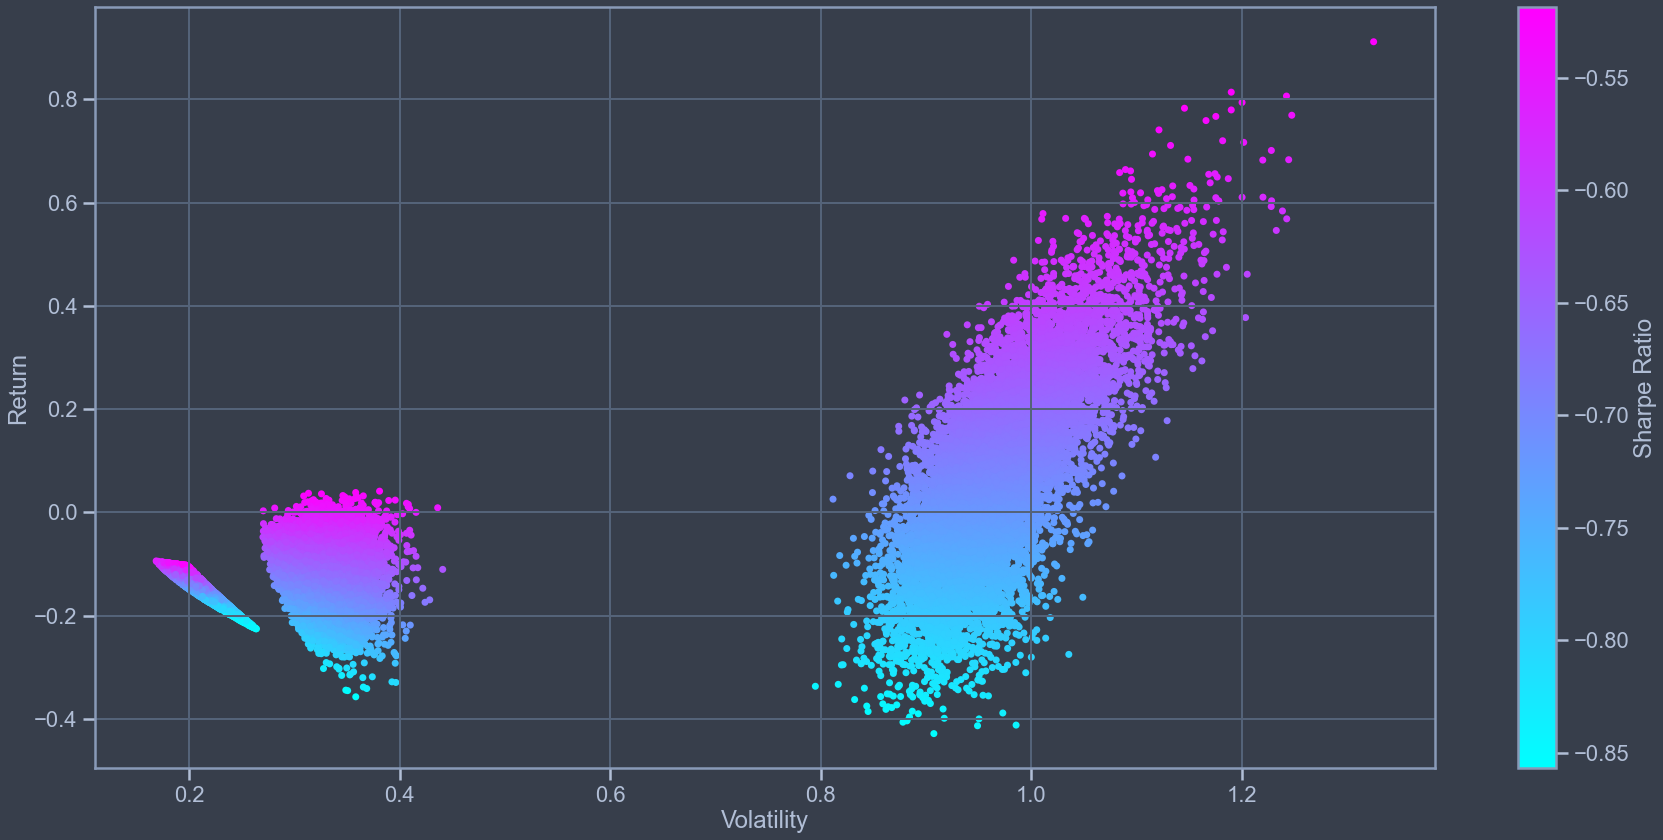

In [1495]:
# Plotting all 10,000 portfolio weighting combinations with a heatmap
plt.figure(figsize=(30,14))

# Using a scatter plot to show our Sharpe Ratio values in terms of return and volatility
plt.scatter(st_volatility_array, st_returns_array, s=25, c=st_sharpe_array, cmap= 'cool')
plt.scatter(cr_volatility_array, cr_returns_array, s=25, c=cr_sharpe_array, cmap = 'cool')
plt.scatter(ind_volatility_array, ind_returns_array, s=25, c=ind_sharpe_array, cmap = 'cool')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

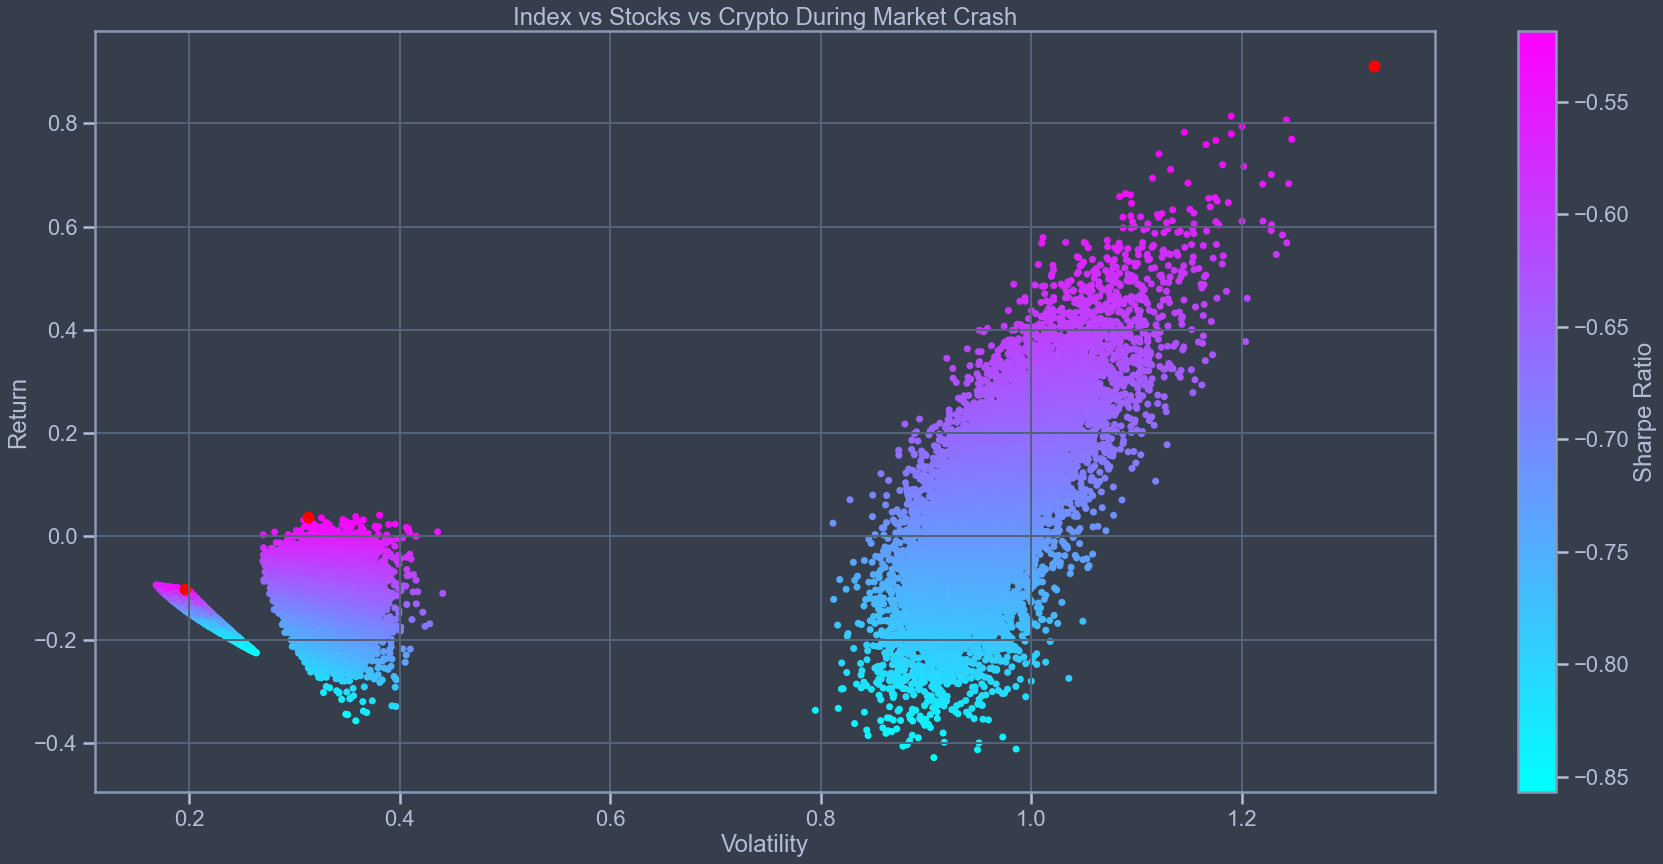

In [1496]:
# Plotting our optimal portfolios
st_max_sharpe_return = st_returns_array[st_max_sharpe_index]
st_max_sharpe_volatility = st_volatility_array[st_max_sharpe_index]

cr_max_sharpe_return = cr_returns_array[cr_max_sharpe_index]
cr_max_sharpe_volatility = cr_volatility_array[cr_max_sharpe_index]

ind_max_sharpe_return = ind_returns_array[ind_max_sharpe_index]
ind_max_sharpe_volatility = ind_volatility_array[ind_max_sharpe_index]


# Plotting our heatmap again
plt.figure(figsize=(30,14))
plt.scatter(st_volatility_array, st_returns_array, s=25, c=st_sharpe_array, cmap = 'cool')
plt.scatter(cr_volatility_array, cr_returns_array, s=25, c=cr_sharpe_array, cmap = 'cool')
plt.scatter(ind_volatility_array, ind_returns_array, s=25, c=ind_sharpe_array, cmap = 'cool')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.title('Index vs Stocks vs Crypto During Market Crash')

# Adding our optimal portfolio as a red dot for ease of reference
plt.scatter(st_max_sharpe_volatility, st_max_sharpe_return, s=100, c='red', edgecolors='red');
plt.scatter(cr_max_sharpe_volatility, cr_max_sharpe_return, s=100, c='red', edgecolors='red');
plt.scatter(ind_max_sharpe_volatility, ind_max_sharpe_return, s=100, c='red', edgecolors='red');

#### As we can see, our optimization model seeks the highest return while generally minimizing volatility for our Index and Stock portfolios.
#### However, it takes a unique approach when dealing with our Crypto portfolio since our model has deemed the high volatility as being worth the dramatically excessive return (particularly with MANA). Even with the volatility-favored approach, our model has optimzed our capital allocation per crypto in such a way that our current Crypto portfolio value is *still* 5.94% higher than our initial $150,000 investment after losing 82.88% of our unrealized gains (showcasing a stong optimization for downside prevention).

In [1497]:
# Creating new lists of optimal position values
st_optimal_position_values = [
    AMD['Optimal Position Value'],
    AAPL['Optimal Position Value'],
    MSFT['Optimal Position Value'],
    ORCL['Optimal Position Value'],
    TSLA['Optimal Position Value'],
    AMZN['Optimal Position Value'],
    GOOG['Optimal Position Value'],
    META['Optimal Position Value']
]

cr_optimal_position_values = [
    BTC['Optimal Position Value'],
    ETH['Optimal Position Value'],
    ADA['Optimal Position Value'],
    SOL['Optimal Position Value'],
    MATIC['Optimal Position Value'],
    MANA['Optimal Position Value'],
    ENJ['Optimal Position Value'],
    VET['Optimal Position Value']
]

ind_optimal_position_values = [
    SPY['Optimal Position Value'],
    NASDAQ['Optimal Position Value'],
    DOWJ['Optimal Position Value']
]

# Concatenating the list of all position values to a single dataframe per portfolio
st_optimal_position_values = pd.concat(st_optimal_position_values, axis = 1)
cr_optimal_position_values = pd.concat(cr_optimal_position_values, axis = 1)
ind_optimal_position_values = pd.concat(ind_optimal_position_values, axis = 1)

# Naming all columns with their respective names per portfolio
st_optimal_position_values.columns = ['AMD','AAPL','MSFT','ORCL','TSLA','AMZN','GOOG','META']
cr_optimal_position_values.columns = ['BTC','ETH','ADA','SOL','MATIC','MANA','ENJ','VET']
ind_optimal_position_values.columns = ['SPY', 'NASDAQ', 'DOWJ']

# Adding a total column for our optimal position values
st_optimal_position_values['Total'] = st_optimal_position_values.sum(axis = 1)
cr_optimal_position_values['Total'] = cr_optimal_position_values.sum(axis = 1)
ind_optimal_position_values['Total'] = ind_optimal_position_values.sum(axis = 1)

display(
    st_optimal_position_values.head(),
    cr_optimal_position_values.head(),
    ind_optimal_position_values.head()
)

AMD     AAPL     MSFT    ORCL     TSLA   AMZN     GOOG   META  \
Date                                                                           
2021-07-01 2767.96 37224.24 46640.75 7389.71 32729.57 144.52 22384.85 718.40   
2021-07-02 2809.19 37953.70 47679.69 7601.53 32776.88 147.81 22801.21 719.03   
2021-07-06 2802.37 38512.32 47681.41 7718.59 31844.13 154.74 22987.57 715.14   
2021-07-07 2685.79 39203.81 48071.23 7998.24 31123.31 155.62 23041.86 710.50   
2021-07-08 2662.06 38843.15 47640.20 7951.78 31517.27 157.09 22882.35 700.69   

               Total  
Date                  
2021-07-01 150000.00  
2021-07-02 152489.05  
2021-07-06 152416.27  
2021-07-07 152990.37  
2021-07-08 152354.58

BTC      ETH     ADA     SOL   MATIC     MANA     ENJ      VET  \
Date                                                                            
2021-07-01 6008.22 39334.62 3513.39 7546.55 4371.21 75720.07 3827.68  9678.27   
2021-07-02 6066.37 40012.68 3668.03 7685.82 4477.73 73979.84 3746.70  9923.55   
2021-07-03 6204.44 41428.43 3700.75 7789.36 4538.70 76624.16 3834.24  9997.11   
2021-07-04 6315.26 43207.75 3835.82 7751.36 4657.28 79540.88 3908.85 10044.93   
2021-07-05 6039.34 40916.06 3695.65 7451.79 4469.61 75041.24 3691.32  9542.02   

               Total  
Date                  
2021-07-01 150000.00  
2021-07-02 149560.71  
2021-07-03 154117.19  
2021-07-04 159262.14  
2021-07-05 150847.02

SPY  NASDAQ     DOWJ     Total
Date                                           
2021-07-01 138241.89    5.54 11752.57 150000.00
2021-07-02 139278.72    5.58 11804.43 151088.73
2021-07-06 138997.12    5.59 11733.51 150736.22
2021-07-07 139464.01    5.59 11768.95 151238.54
2021-07-08 138270.05    5.55 11680.77 149956.37

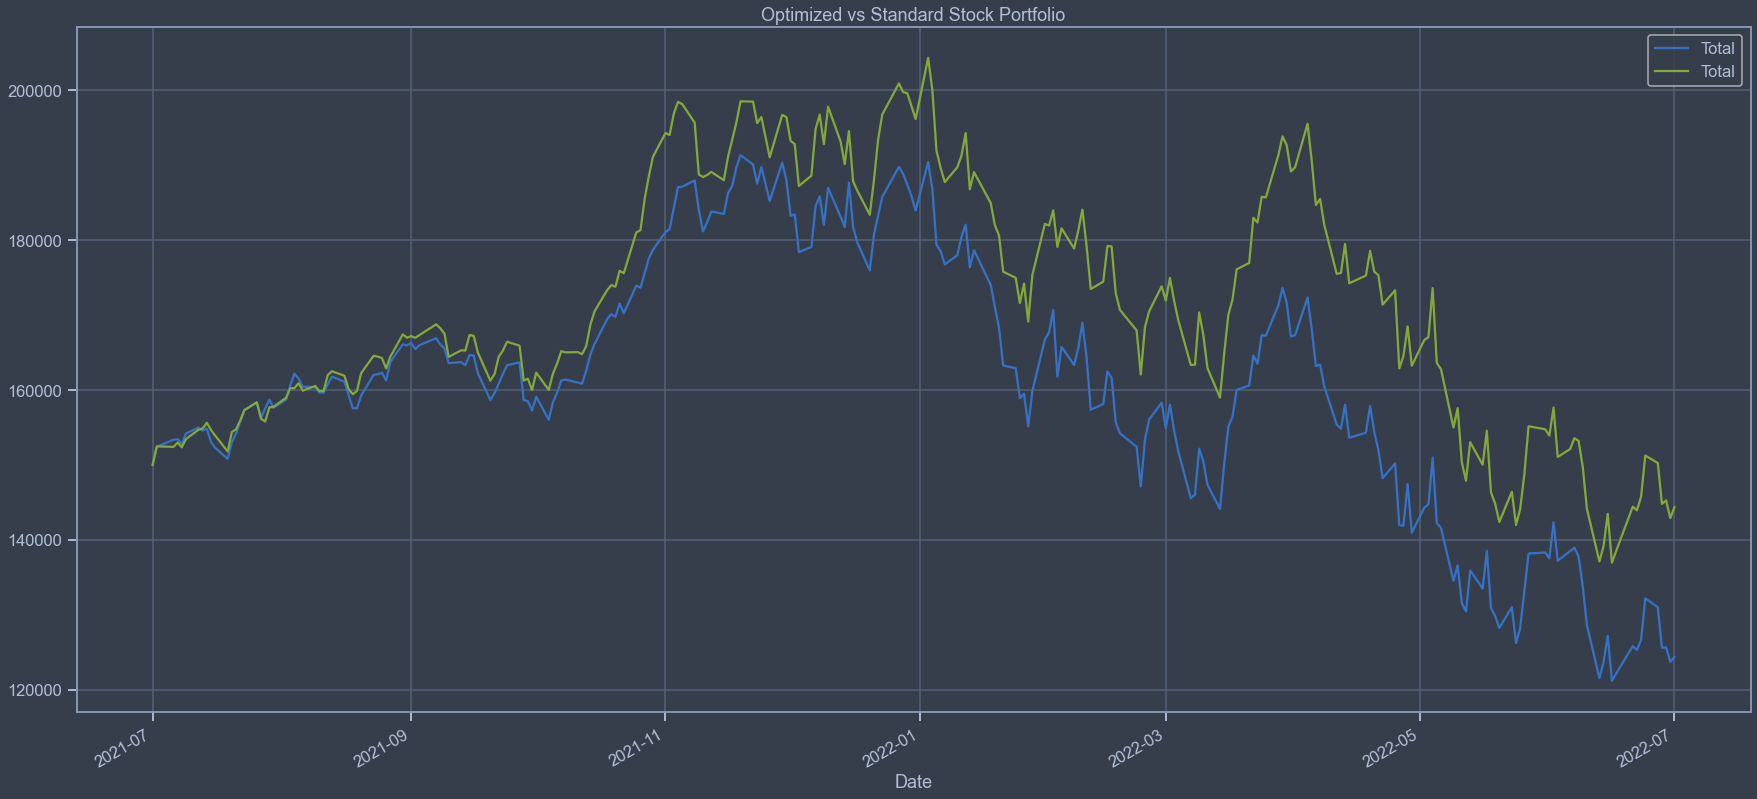

In [1498]:
# Plotting our optimized stock portfolio compared to our standard stock portfolio

sns.set_context('talk')
st_position_values['Total'].plot(figsize=(30,14), c='b',legend='Test');
st_optimal_position_values['Total'].plot(figsize=(30,14), title='Optimized vs Standard Stock Portfolio', c='g', legend='Total');

# TODO Edit legend to showcase which portfolio belongs to which color

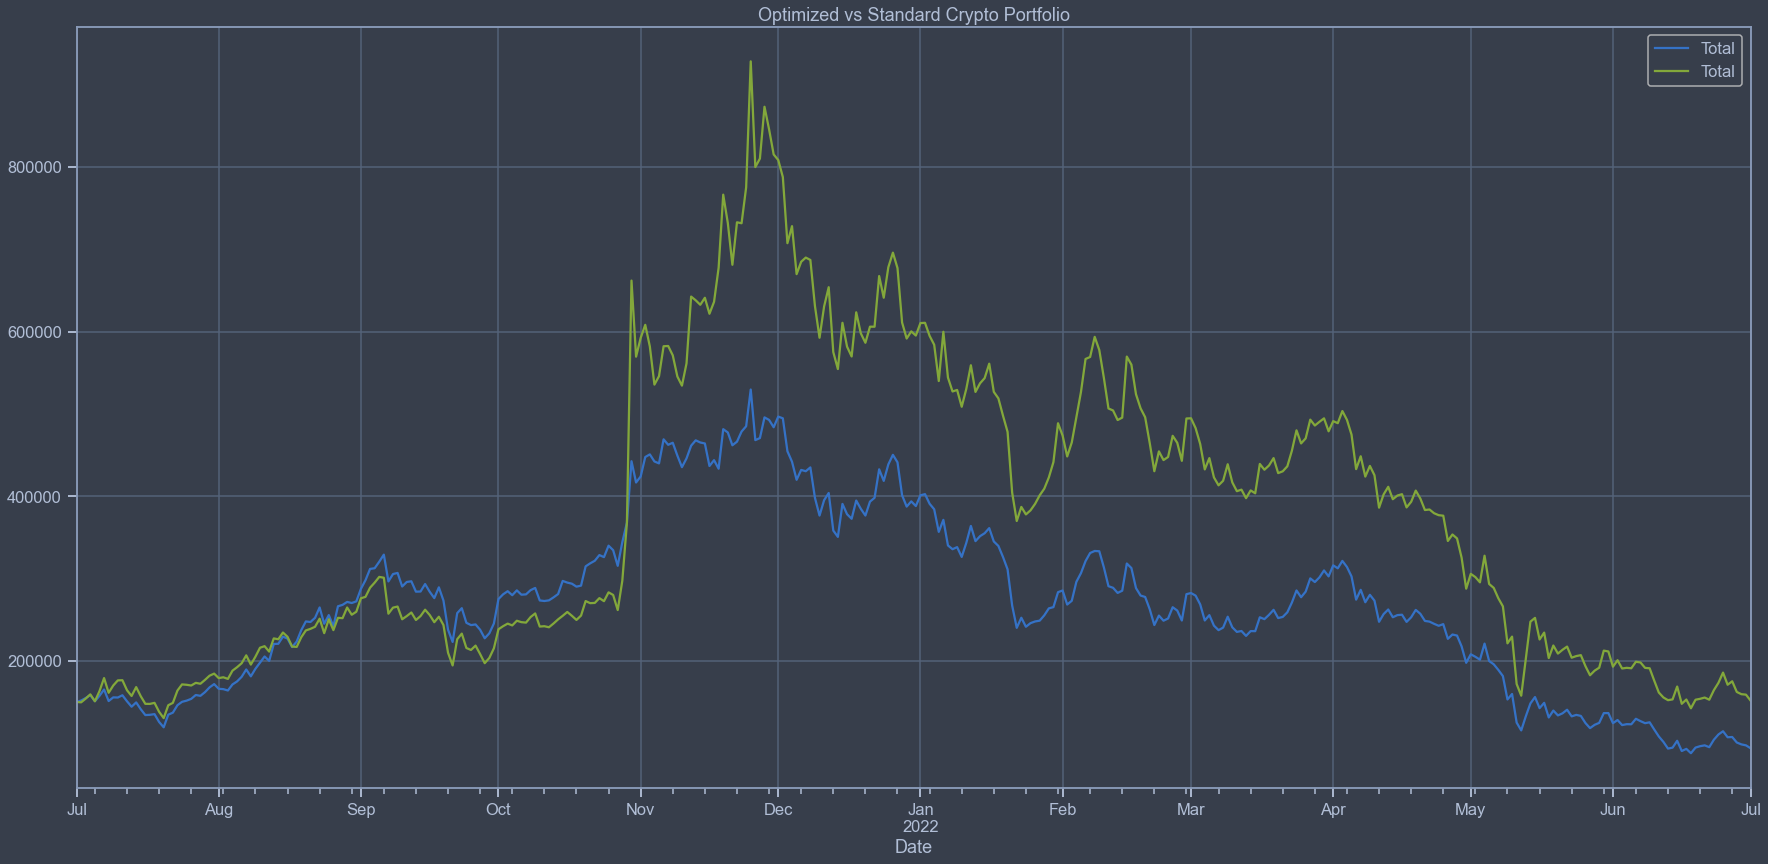

In [1499]:
# Plotting our optimized crypto portfolio compared to our standard crypto portfolio
cr_position_values['Total'].plot(figsize=(30,14), c='b',legend='Total');
cr_optimal_position_values['Total'].plot(figsize=(30,14), title='Optimized vs Standard Crypto Portfolio', c='g', legend='Total');

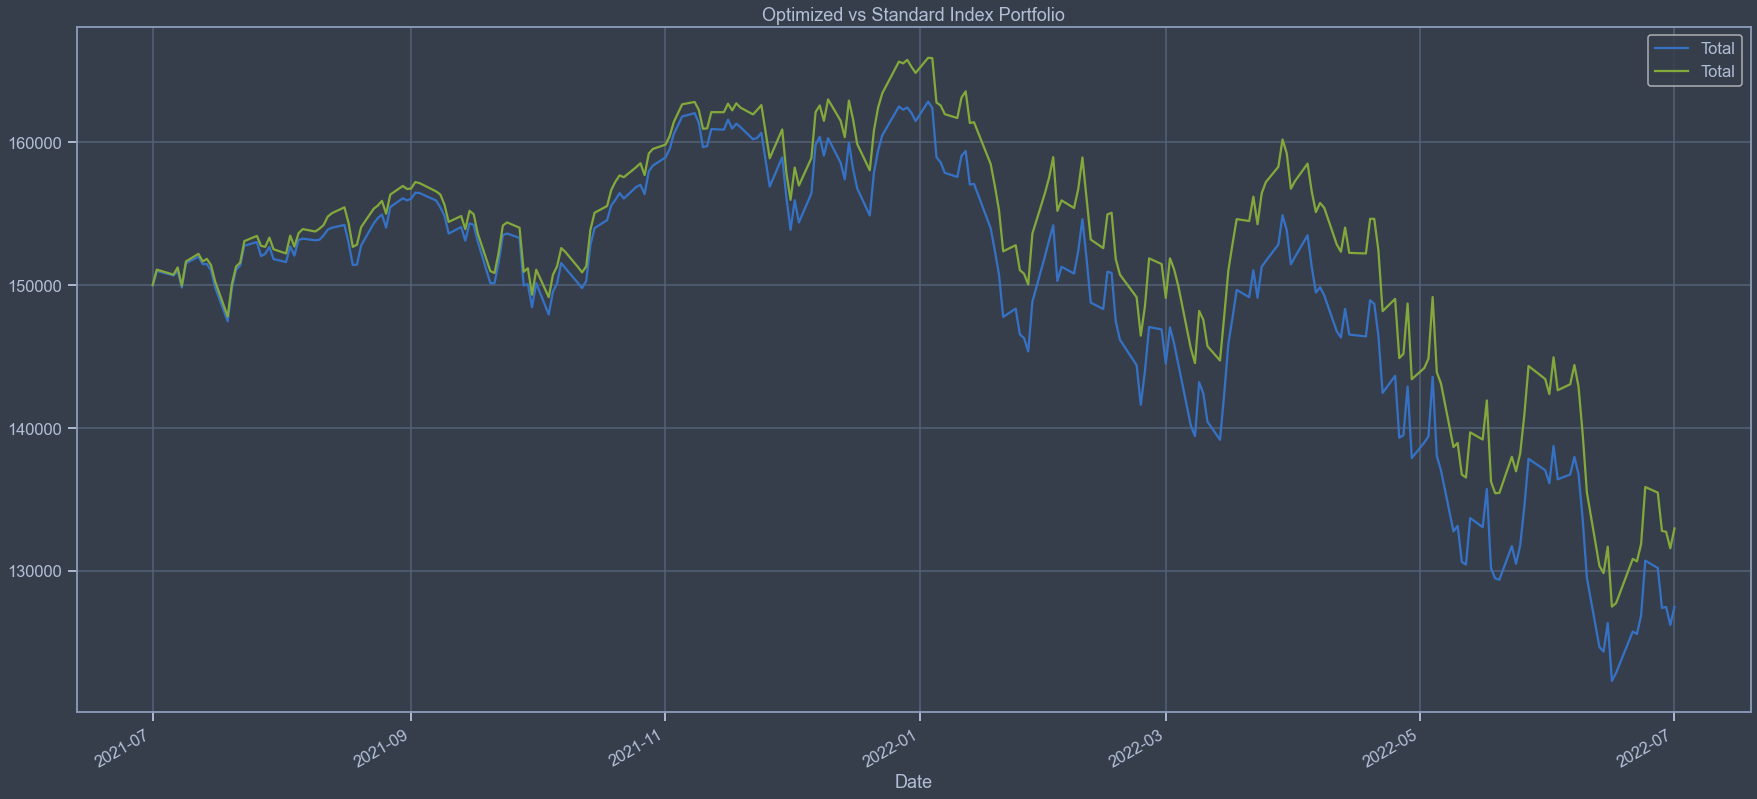

In [1500]:
# Plotting our optimized index portfolio compared to our standard index portfolio
ind_position_values['Total'].plot(figsize=(30,14), c='b',legend='Total');
ind_optimal_position_values['Total'].plot(figsize=(30,14), title='Optimized vs Standard Index Portfolio', c='g', legend='Total');

In [1501]:
# Examining key metrics between our optimized portfolio strategy and our standard portfolio strategy

print(
# Calculating differences in high / low / current values between portfolios
        '---\n** VALUES FOR STOCK PORTFOLIO **\n---',
    # Both highs
        '\nHighest Stock Portfolio Value (Standard) = ${:,.2f}'.
            format(st_position_values['Total'][i_st_high]),
        '\nHighest Stock Portfolio Value (Optimized) = ${:,.2f}'.
            format(st_optimal_position_values['Total'][i_st_high]),
    # Diff b/w highs
        '\n     Optimized High is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard High'.
            format(
                ((st_optimal_position_values['Total'][i_st_high] / st_position_values['Total'][i_st_high])-1)*100,
                (st_optimal_position_values['Total'][i_st_high] - st_position_values['Total'][i_st_high])
            ),
    # Both lows
        '\n\nLowest Stock Portfolio Value (Standard) = ${:,.2f}'.
            format(st_position_values['Total'][i_st_low]),
        '\nLowest Stock Portfolio Value (Optimized) = ${:,.2f}'.
            format(st_optimal_position_values['Total'][i_st_low]),
    # Diff b/w lows
        '\n     Optimized Low is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard Low'.
            format(
                ((st_optimal_position_values['Total'][i_st_low] / st_position_values['Total'][i_st_low])-1)*100,
                (st_optimal_position_values['Total'][i_st_low] - st_position_values['Total'][i_st_low])
            ),
    # Both currents
        '\n\nCurrent Stock Portfolio Value (Standard) = ${:,.2f} ({:,.2f}% of Initial ${:,.0f} Investment)'.
            format(
                st_position_values['Total'][i_st_current],
                ((st_position_values['Total'][i_st_current] / st_position_values['Total'][0])*100),
                portfolio_value
            ),
        '\nCurrent Stock Portfolio Value (Optimized) = ${:,.2f} ({:,.2f}% of Initial ${:,.0f} Investment)'.
            format(
                st_optimal_position_values['Total'][i_st_current],
                (st_optimal_position_values['Total'][i_st_current] / st_optimal_position_values['Total'][0])*100,
                portfolio_value
            ),
    # Diff b/w currents
        '\n     Optimized Current Value is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard Current Value'.
            format(
                ((st_optimal_position_values['Total'][i_st_current] / st_position_values['Total'][i_st_current])-1)*100,
                (st_optimal_position_values['Total'][i_st_current] - st_position_values['Total'][i_st_current])
            ),

# Calculating differences in final values between portfolios
    # Stnd losses [high : current]
        '\n\nLosses Faced During Market Crash (Standard) = {:+,.2f}% (${:+,.2f})'.
            format(
                ((st_position_values['Total'][i_st_current] / st_position_values['Total'][i_st_high])-1)*100,
                (st_position_values['Total'][i_st_current] - st_position_values['Total'][i_st_high])
            ),
    # Optm losses [high : current]
        '\nLosses Faced During Market Crash (Optimized) = {:+,.2f}% (${:+,.2f})'.
            format(
                ((st_optimal_position_values['Total'][i_st_current] / st_optimal_position_values['Total'][i_st_high])-1)*100,
                (st_optimal_position_values['Total'][i_st_current] - st_optimal_position_values['Total'][i_st_high])
            ),
    # Diff b/w losses
        '\n     Optimized Losses are {:,.2f}% (${:,.2f}) Less Than Standard Losses'.
            format(
                abs(
                    (((st_position_values['Total'][i_st_current] / st_position_values['Total'][i_st_high])-1)*100) -
                    (((st_optimal_position_values['Total'][i_st_current] / st_optimal_position_values['Total'][i_st_high])-1)*100)
                ),
                (
                    ((st_optimal_position_values['Total'][i_st_current] - st_optimal_position_values['Total'][i_st_high])) -
                    ((st_position_values['Total'][i_st_current] - st_position_values['Total'][i_st_high]))
                )
            )
)

print(
# Calculating differences in high / low / current values between portfolios
        '\n---\n** VALUES FOR CRYPTO PORTFOLIO **\n---',
    # Both highs
        '\nHighest Crypto Portfolio Value (Standard) = ${:,.2f}'.
            format(cr_position_values['Total'][i_cr_high]),
        '\nHighest Crypto Portfolio Value (Optimized) = ${:,.2f}'.
            format(cr_optimal_position_values['Total'][i_cr_high]),
    # Diff b/w highs
        '\n     Optimized High is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard High'.
            format(
                ((cr_optimal_position_values['Total'][i_cr_high] / cr_position_values['Total'][i_cr_high])-1)*100,
                (cr_optimal_position_values['Total'][i_cr_high] - cr_position_values['Total'][i_cr_high])
            ),
    # Both lows
        '\n\nLowest Crypto Portfolio Value (Standard) = ${:,.2f}'.
            format(cr_position_values['Total'][i_cr_low]),
        '\nLowest Crypto Portfolio Value (Optimized) = ${:,.2f}'.
            format(cr_optimal_position_values['Total'][i_cr_low]),
    # Diff b/w lows
        '\n     Optimized Low is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard Low'.
            format(
                ((cr_optimal_position_values['Total'][i_cr_low] / cr_position_values['Total'][i_cr_low])-1)*100,
                (cr_optimal_position_values['Total'][i_cr_low] - cr_position_values['Total'][i_cr_low])
            ),
    # Both currents
        '\n\nCurrent Crypto Portfolio Value (Standard) = ${:,.2f} ({:,.2f}% of Initial ${:,.0f} Investment)'.
            format(
                cr_position_values['Total'][i_cr_current],
                ((cr_position_values['Total'][i_cr_current] / cr_position_values['Total'][0])*100),
                portfolio_value
            ),
        '\nCurrent Crypto Portfolio Value (Optimized) = ${:,.2f} ({:,.2f}% of Initial ${:,.0f} Investment)'.
            format(
                cr_optimal_position_values['Total'][i_cr_current],
                ((cr_optimal_position_values['Total'][i_cr_current] / cr_optimal_position_values['Total'][0])*100),
                portfolio_value
            ),
    # Diff b/w currents
        '\n     Optimized Current Value is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard Current Value'.
            format(
                ((cr_optimal_position_values['Total'][i_cr_current] / cr_position_values['Total'][i_cr_current])-1)*100,
                (cr_optimal_position_values['Total'][i_cr_current] - cr_position_values['Total'][i_cr_current])
            ),

# Calculating differences in final values between portfolios
    # Stnd losses [high : current]
        '\n\nLosses Faced During Market Crash (Standard) = {:+,.2f}% (${:+,.2f})'.
            format(
                ((cr_position_values['Total'][i_cr_current] / cr_position_values['Total'][i_cr_high])-1)*100,
                (cr_position_values['Total'][i_cr_current] - cr_position_values['Total'][i_cr_high])
            ),
    # Optm losses [high : current]
        '\nLosses Faced During Market Crash (Optimized) = {:+,.2f}% (${:+,.2f})'.
            format(
                ((cr_optimal_position_values['Total'][i_cr_current] / cr_optimal_position_values['Total'][i_cr_high])-1)*100,
                (cr_optimal_position_values['Total'][i_cr_current] - cr_optimal_position_values['Total'][i_cr_high])
            ),
    # Diff b/w losses
        '\n     Optimized Losses are {:,.2f}% (${:,.2f}) Less Than Standard Losses'.
            format(
                abs(
                    (((cr_position_values['Total'][i_cr_current] / cr_position_values['Total'][i_cr_high])-1)*100) -
                    (((cr_optimal_position_values['Total'][i_cr_current] / cr_optimal_position_values['Total'][i_cr_high])-1)*100)
                ),
                (
                    ((cr_optimal_position_values['Total'][i_cr_current] - cr_optimal_position_values['Total'][i_cr_high])) -
                    ((cr_position_values['Total'][i_cr_current] - cr_position_values['Total'][i_cr_high]))
                )
            )
)

print(
# Calculating differences in high / low / current values between portfolios
        '\n---\n** VALUES FOR INDEX PORTFOLIO **\n---',
    # Both highs
        '\nHighest Index Portfolio Value (Standard) = ${:,.2f}'.
            format(ind_position_values['Total'][i_ind_high]),
        '\nHighest Index Portfolio Value (Optimized) = ${:,.2f}'.
            format(ind_optimal_position_values['Total'][i_ind_high]),
    # Diff b/w highs
        '\n     Optimized High is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard High'.
            format(
                ((ind_optimal_position_values['Total'][i_ind_high] / ind_position_values['Total'][i_ind_high])-1)*100,
                (ind_optimal_position_values['Total'][i_ind_high] - ind_position_values['Total'][i_ind_high])
            ),
    # Both lows
        '\n\nLowest Index Portfolio Value (Standard) = ${:,.2f}'.
            format(ind_position_values['Total'][i_ind_low]),
        '\nLowest Index Portfolio Value (Optimized) = ${:,.2f}'.
            format(ind_optimal_position_values['Total'][i_ind_low]),
    # Diff b/w lows
        '\n     Optimized Low is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard Low'.
            format(
                ((ind_optimal_position_values['Total'][i_ind_low] / ind_position_values['Total'][i_ind_low])-1)*100,
                (ind_optimal_position_values['Total'][i_ind_low] - ind_position_values['Total'][i_ind_low])
            ),
    # Both currents
        '\n\nCurrent Index Portfolio Value (Standard) = ${:,.2f} ({:,.2f}% of Initial ${:,.0f} Investment)'.
            format(
                ind_position_values['Total'][i_ind_current],
                ((ind_position_values['Total'][i_ind_current] / ind_position_values['Total'][0])*100),
                portfolio_value
            ),
        '\nCurrent Index Portfolio Value (Optimized) = ${:,.2f} ({:,.2f}% of Initial ${:,.0f} Investment)'.
            format(
                ind_optimal_position_values['Total'][i_ind_current],
                ((ind_optimal_position_values['Total'][i_ind_current] / ind_optimal_position_values['Total'][0])*100),
                portfolio_value
            ),
    # Diff b/w currents
        '\n     Optimized Current Value is {:+,.2f}% ({:+,.2f} USD) Higher Than Standard Current Value'.
            format(
                ((ind_optimal_position_values['Total'][i_ind_current] / ind_position_values['Total'][i_ind_current])-1)*100,
                (ind_optimal_position_values['Total'][i_ind_current] - ind_position_values['Total'][i_ind_current])
            ),

# Calculating differences in final values between portfolios
    # Stnd losses [high : current]
        '\n\nLosses Faced During Market Crash (Standard) = {:+,.2f}% (${:+,.2f})'.
            format(
                ((ind_position_values['Total'][i_ind_current] / ind_position_values['Total'][i_ind_high])-1)*100,
                (ind_position_values['Total'][i_ind_current] - ind_position_values['Total'][i_ind_high])
            ),
    # Optm losses [high : current]
        '\nLosses Faced During Market Crash (Optimized) = {:+,.2f}% (${:+,.2f})'.
            format(
                ((ind_optimal_position_values['Total'][i_ind_current] / ind_optimal_position_values['Total'][i_ind_high])-1)*100,
                (ind_optimal_position_values['Total'][i_ind_current] - ind_optimal_position_values['Total'][i_ind_high])
            ),
    # Diff b/w losses
        '\n     Optimized Losses are {:,.2f}% (${:,.2f}) Less Than Standard Losses'.
            format(
                abs(
                    (((ind_position_values['Total'][i_ind_current] / ind_position_values['Total'][i_ind_high])-1)*100) -
                    (((ind_optimal_position_values['Total'][i_ind_current] / ind_optimal_position_values['Total'][i_ind_high])-1)*100)
                ),
                (
                    ((ind_optimal_position_values['Total'][i_ind_current] - ind_optimal_position_values['Total'][i_ind_high])) -
                    ((ind_position_values['Total'][i_ind_current] - ind_position_values['Total'][i_ind_high]))
                )
            )
)

---
** VALUES FOR STOCK PORTFOLIO **
--- 
Highest Stock Portfolio Value (Standard) = $191,357.26 
Highest Stock Portfolio Value (Optimized) = $198,524.69 
     Optimized High is +3.75% (+7,167.43 USD) Higher Than Standard High 

Lowest Stock Portfolio Value (Standard) = $121,180.31 
Lowest Stock Portfolio Value (Optimized) = $136,962.05 
     Optimized Low is +13.02% (+15,781.74 USD) Higher Than Standard Low 

Current Stock Portfolio Value (Standard) = $124,386.51 (82.92% of Initial $150,000 Investment) 
Current Stock Portfolio Value (Optimized) = $144,353.36 (96.24% of Initial $150,000 Investment) 
     Optimized Current Value is +16.05% (+19,966.85 USD) Higher Than Standard Current Value 

Losses Faced During Market Crash (Standard) = -35.00% ($-66,970.75) 
Losses Faced During Market Crash (Optimized) = -27.29% ($-54,171.33) 
     Optimized Losses are 7.71% ($12,799.42) Less Than Standard Losses

---
** VALUES FOR CRYPTO PORTFOLIO **
--- 
Highest Crypto Portfolio Value (Standard) = $

In [1502]:
# Cleaning our position value dataframes to plot individual asset performance between our optimized and standard portfolios
st_indv_position_values = st_position_values.drop(['Total', 'Daily Return'], axis=1)
st_indv_optimal_position_values = st_optimal_position_values.drop('Total', axis=1)

cr_indv_position_values = cr_position_values.drop(['Total', 'Daily Return'], axis=1)
cr_indv_optimal_position_values = cr_optimal_position_values.drop('Total', axis=1)

ind_indv_position_values = ind_position_values.drop(['Total', 'Daily Return'], axis=1)
ind_indv_optimal_position_values = ind_optimal_position_values.drop('Total', axis=1)

display(
    st_indv_position_values.head(3),
    st_indv_optimal_position_values.head(3),

    cr_indv_position_values.head(3),
    cr_indv_optimal_position_values.head(3),

    ind_indv_position_values.head(3),
    ind_indv_optimal_position_values.head(3)
)

AMD     AAPL     MSFT     ORCL     TSLA     AMZN     GOOG  \
Date                                                                        
2021-07-01 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00   
2021-07-02 19029.31 19117.43 19167.66 19287.46 18777.11 19176.07 19098.76   
2021-07-06 18983.09 19398.81 19168.35 19584.49 18242.75 20075.95 19254.85   

               META  
Date                 
2021-07-01 18750.00  
2021-07-02 18766.40  
2021-07-06 18664.82

AMD     AAPL     MSFT    ORCL     TSLA   AMZN     GOOG   META
Date                                                                        
2021-07-01 2767.96 37224.24 46640.75 7389.71 32729.57 144.52 22384.85 718.40
2021-07-02 2809.19 37953.70 47679.69 7601.53 32776.88 147.81 22801.21 719.03
2021-07-06 2802.37 38512.32 47681.41 7718.59 31844.13 154.74 22987.57 715.14

BTC      ETH      ADA      SOL    MATIC     MANA      ENJ  \
Date                                                                        
2021-07-01 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00   
2021-07-02 18931.47 19073.22 19575.27 19096.02 19206.92 18319.08 18353.32   
2021-07-03 19362.36 19748.08 19749.89 19353.29 19468.44 18973.87 18782.16   

                VET  
Date                 
2021-07-01 18750.00  
2021-07-02 19225.18  
2021-07-03 19367.69

BTC      ETH     ADA     SOL   MATIC     MANA     ENJ     VET
Date                                                                        
2021-07-01 6008.22 39334.62 3513.39 7546.55 4371.21 75720.07 3827.68 9678.27
2021-07-02 6066.37 40012.68 3668.03 7685.82 4477.73 73979.84 3746.70 9923.55
2021-07-03 6204.44 41428.43 3700.75 7789.36 4538.70 76624.16 3834.24 9997.11

SPY   NASDAQ     DOWJ
Date                                 
2021-07-01 50000.00 50000.00 50000.00
2021-07-02 50375.00 50402.66 50220.62
2021-07-06 50273.15 50486.35 49918.92

SPY  NASDAQ     DOWJ
Date                                 
2021-07-01 138241.89    5.54 11752.57
2021-07-02 139278.72    5.58 11804.43
2021-07-06 138997.12    5.59 11733.51

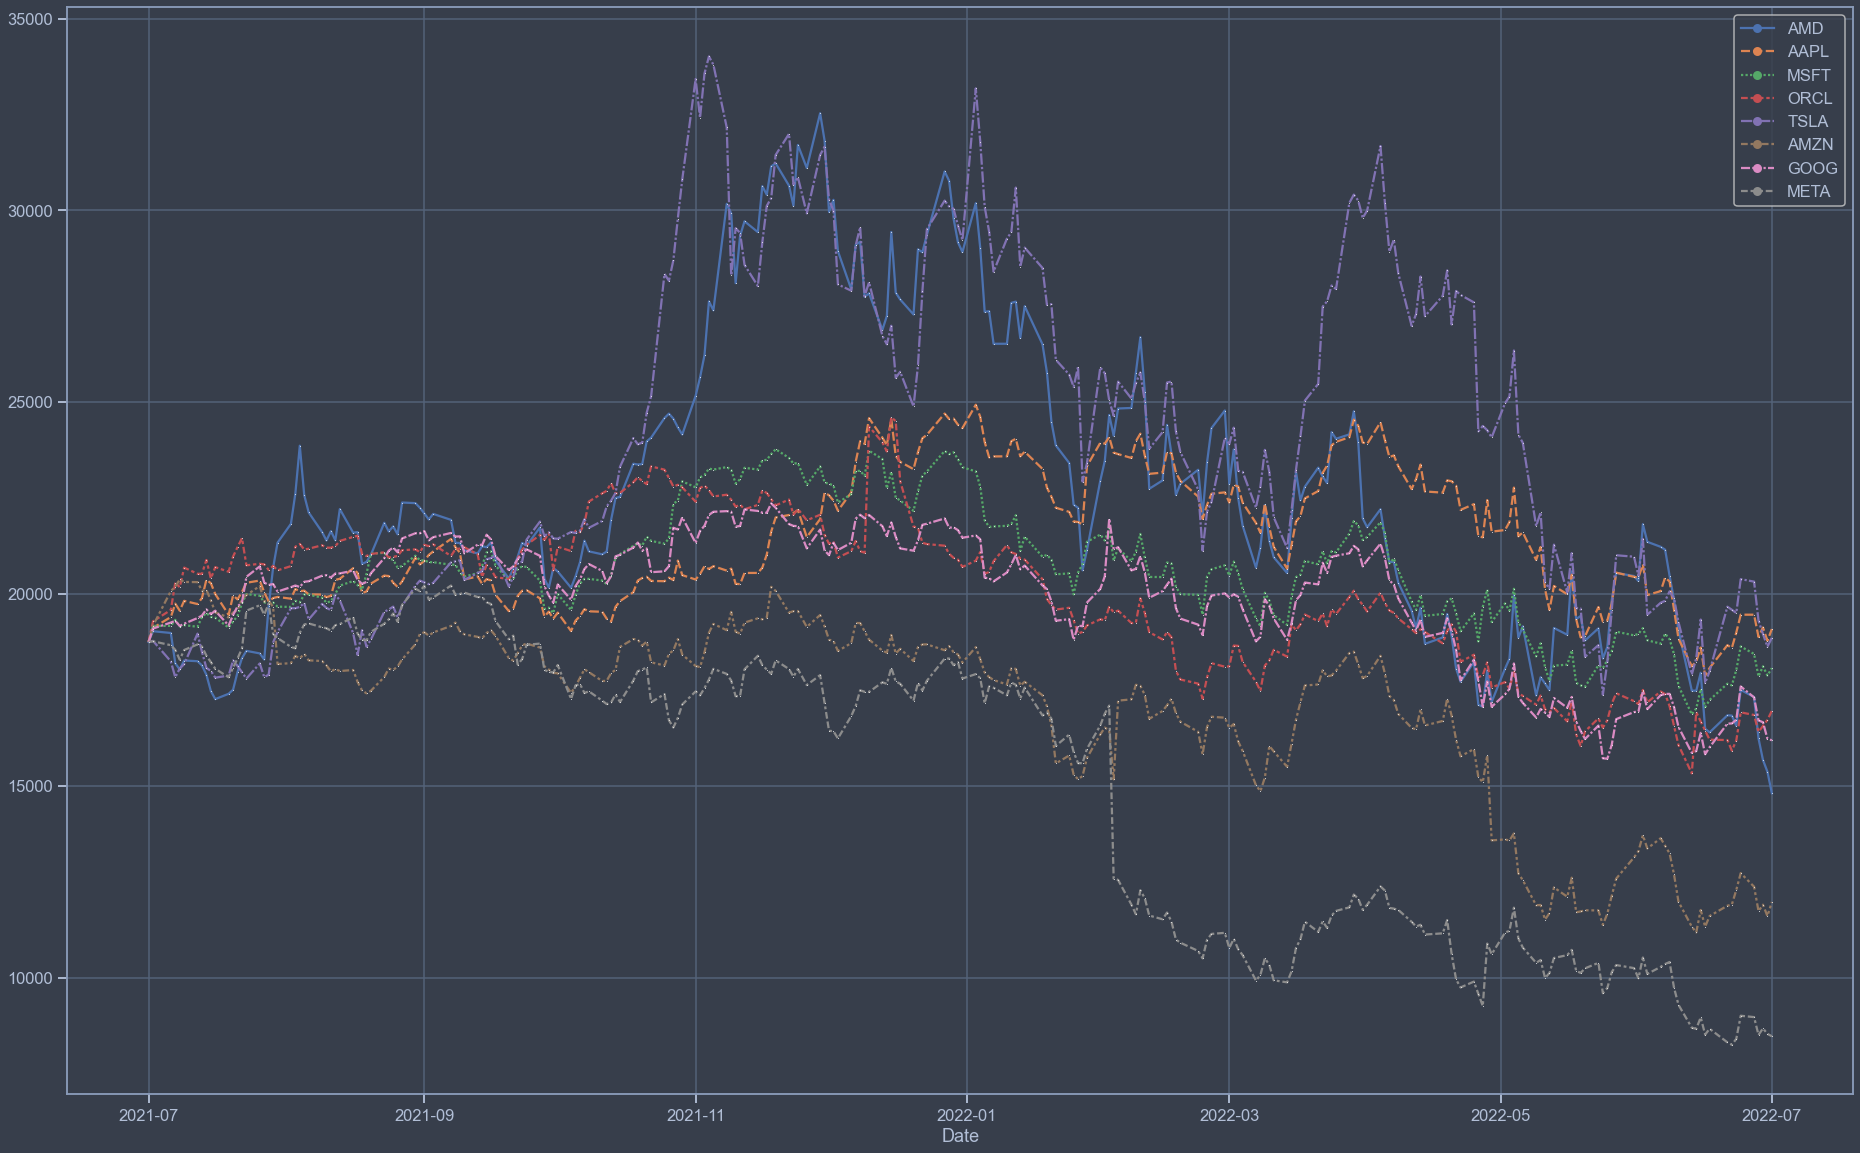

In [1503]:
# Plotting performance of individual assets in our standard stock portfolio
fig, ax = plt.subplots(figsize=(32,20))
sns.set_context('talk')

# Adding markers to stocks in our standard stock portfolio for ease of comparison
sns.lineplot(data=st_indv_position_values, palette="deep", dashes=True, linestyle ='-.', markers=['o','o','o','o','o','o','o','o'], markersize=0.3);

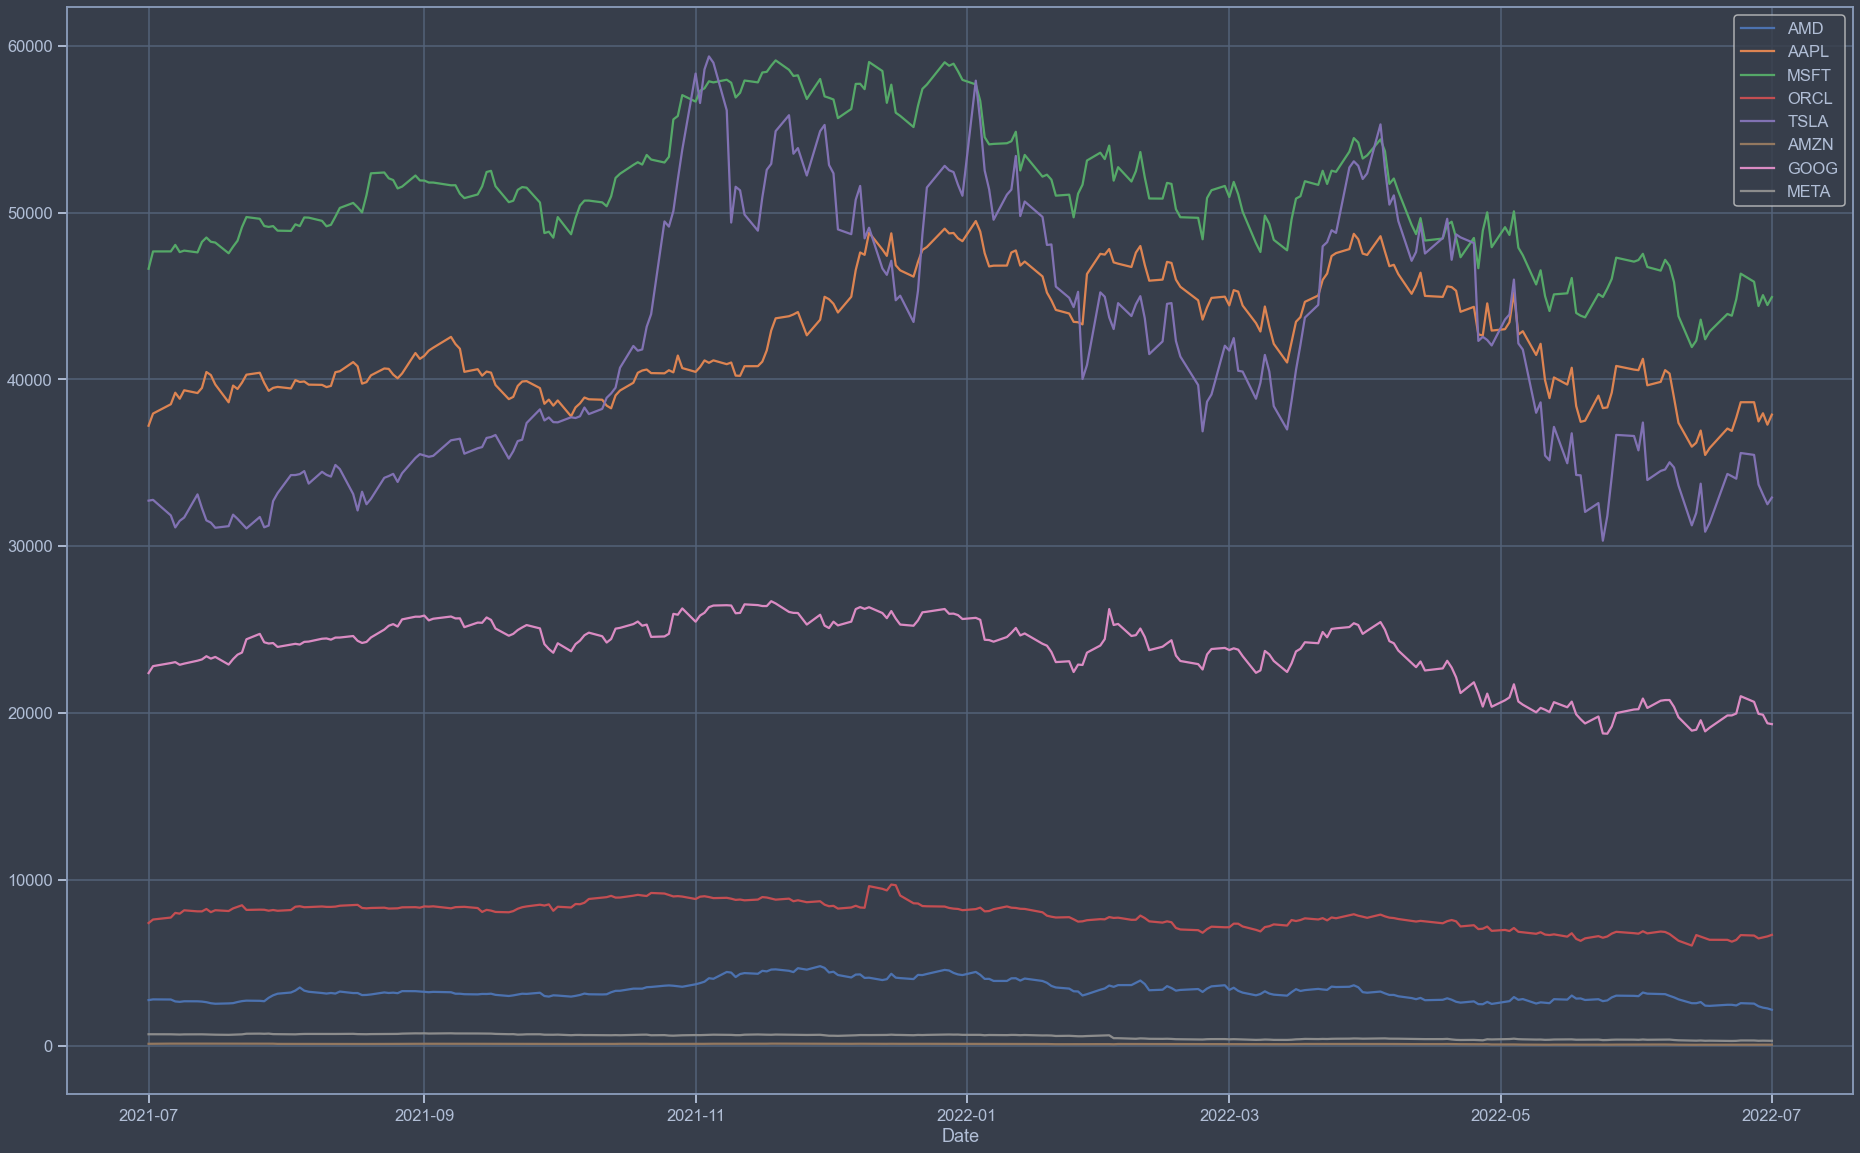

In [1504]:
# Plotting performance of individual assets in our optimized stock portfolio
fig, ax = plt.subplots(figsize=(32,20))
sns.lineplot(data=st_indv_optimal_position_values, palette="deep", dashes=False);

In [1505]:
show_optimal_distr('st')

Optimal Distributions per Stock (Sorted by Weight):


Stock  Weight
2  MSFT  0.3109
1  AAPL  0.2482
4  TSLA  0.2182
6  GOOG  0.1492
3  ORCL  0.0493
0   AMD  0.0185
7  META  0.0048
5  AMZN  0.0010

In [1506]:
# Examining differences between initial amounts and final amounts per asset with our standard and optimal portfolios
display(
    st_indv_position_values.head(1),
    st_indv_position_values.tail(1),
    st_indv_optimal_position_values.head(1),
    st_indv_optimal_position_values.tail(1)
)

AMD     AAPL     MSFT     ORCL     TSLA     AMZN     GOOG  \
Date                                                                        
2021-07-01 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00 18750.00   

               META  
Date                 
2021-07-01 18750.00

AMD     AAPL     MSFT     ORCL     TSLA     AMZN     GOOG  \
Date                                                                        
2022-07-01 14803.48 19085.16 18066.52 16954.75 18857.04 11967.77 16184.96   

              META  
Date                
2022-07-01 8466.84

AMD     AAPL     MSFT    ORCL     TSLA   AMZN     GOOG   META
Date                                                                        
2021-07-01 2767.96 37224.24 46640.75 7389.71 32729.57 144.52 22384.85 718.40

AMD     AAPL     MSFT    ORCL     TSLA  AMZN     GOOG   META
Date                                                                       
2022-07-01 2185.36 37889.63 44940.60 6682.16 32916.41 92.25 19322.55 324.41

## 1. Model's Favored Stocks (MSFT, AAPL, TSLA)

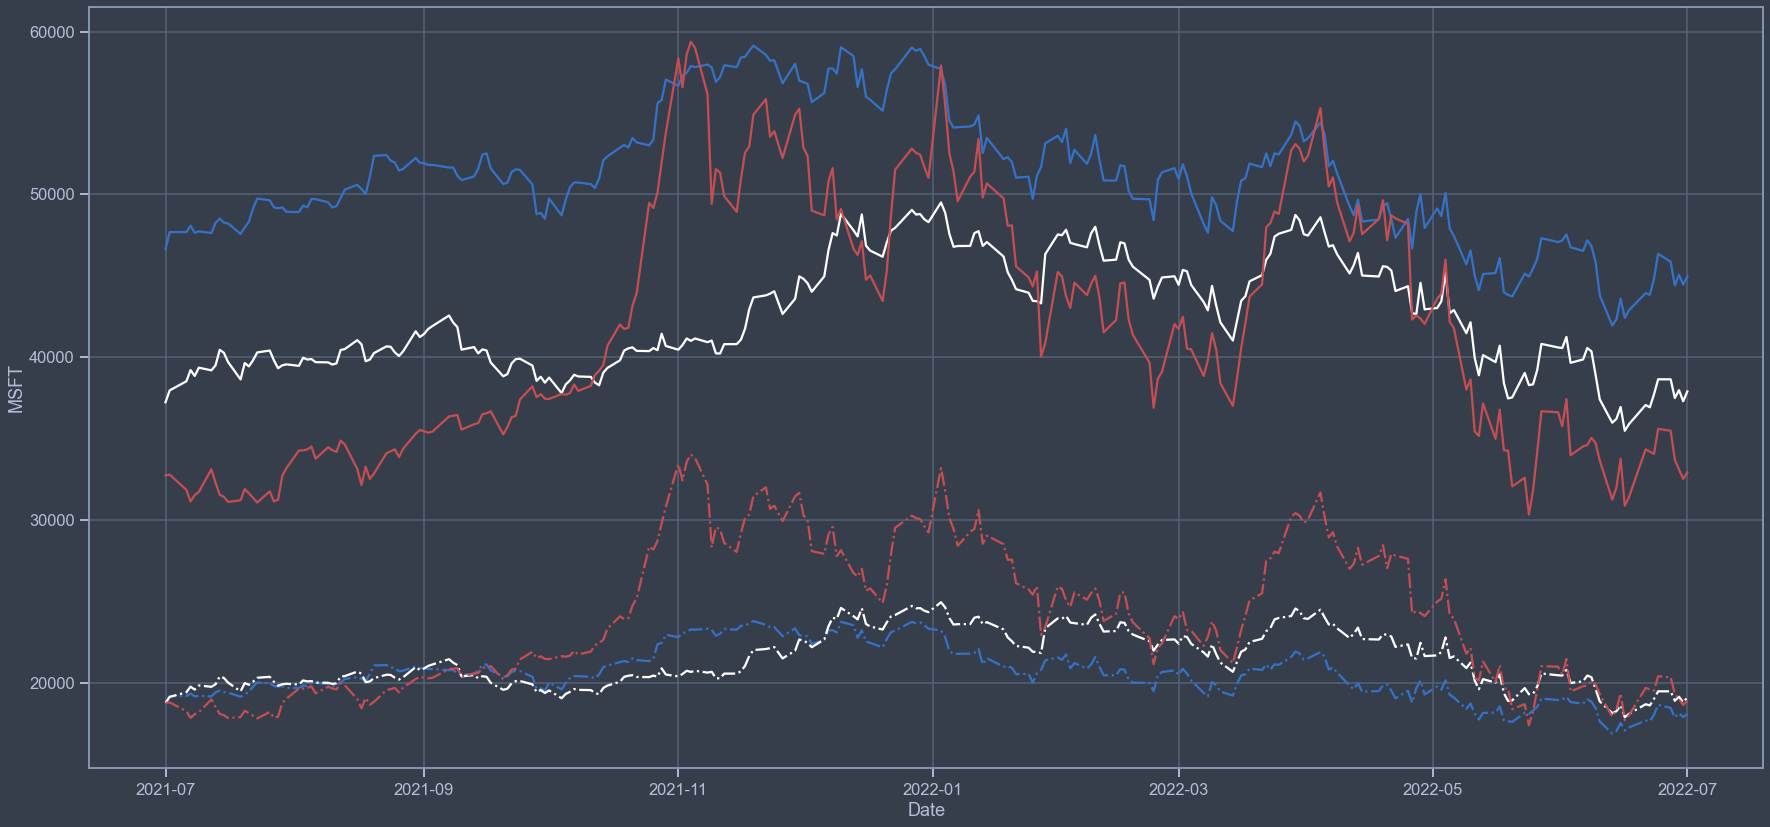

In [1507]:
# Optimzed vs standard performance comparison for our model's favored stocks
fig, ax = plt.subplots(figsize=(30,14))
sns.set_context('talk')

sns.lineplot(data=st_position_values['MSFT'], color='b', dashes=True, linestyle='-.', markers=True);
sns.lineplot(data=st_position_values['AAPL'], color='w', dashes=True, linestyle='-.', markers=True);
sns.lineplot(data=st_position_values['TSLA'], color='r', dashes=True, linestyle='-.', markers=True);

sns.lineplot(data=st_optimal_position_values['MSFT'], color='b', dashes=False);
sns.lineplot(data=st_optimal_position_values['AAPL'], color='w', dashes=False);
sns.lineplot(data=st_optimal_position_values['TSLA'], color='r', dashes=False);

For the stock portfolio, our model has discovered that a combination of investing in MSFT, APPL, and TSLA would have yielded the most return at the highs and would lead to an overall higher current portfolio value.

We can see that our portfolio optimization model favors stocks that not only have a rather strong growth trend but more importantly, stocks that have a softer downtrend. It's worth noting that even throughout the crashes for these stocks, our position values still leave off somewhat close to our initial investment amounts in these stocks (rather than losing an average of 17.08% per stock like our standard portfolio).

## 2. Model's Downside Hedge Using GOOG

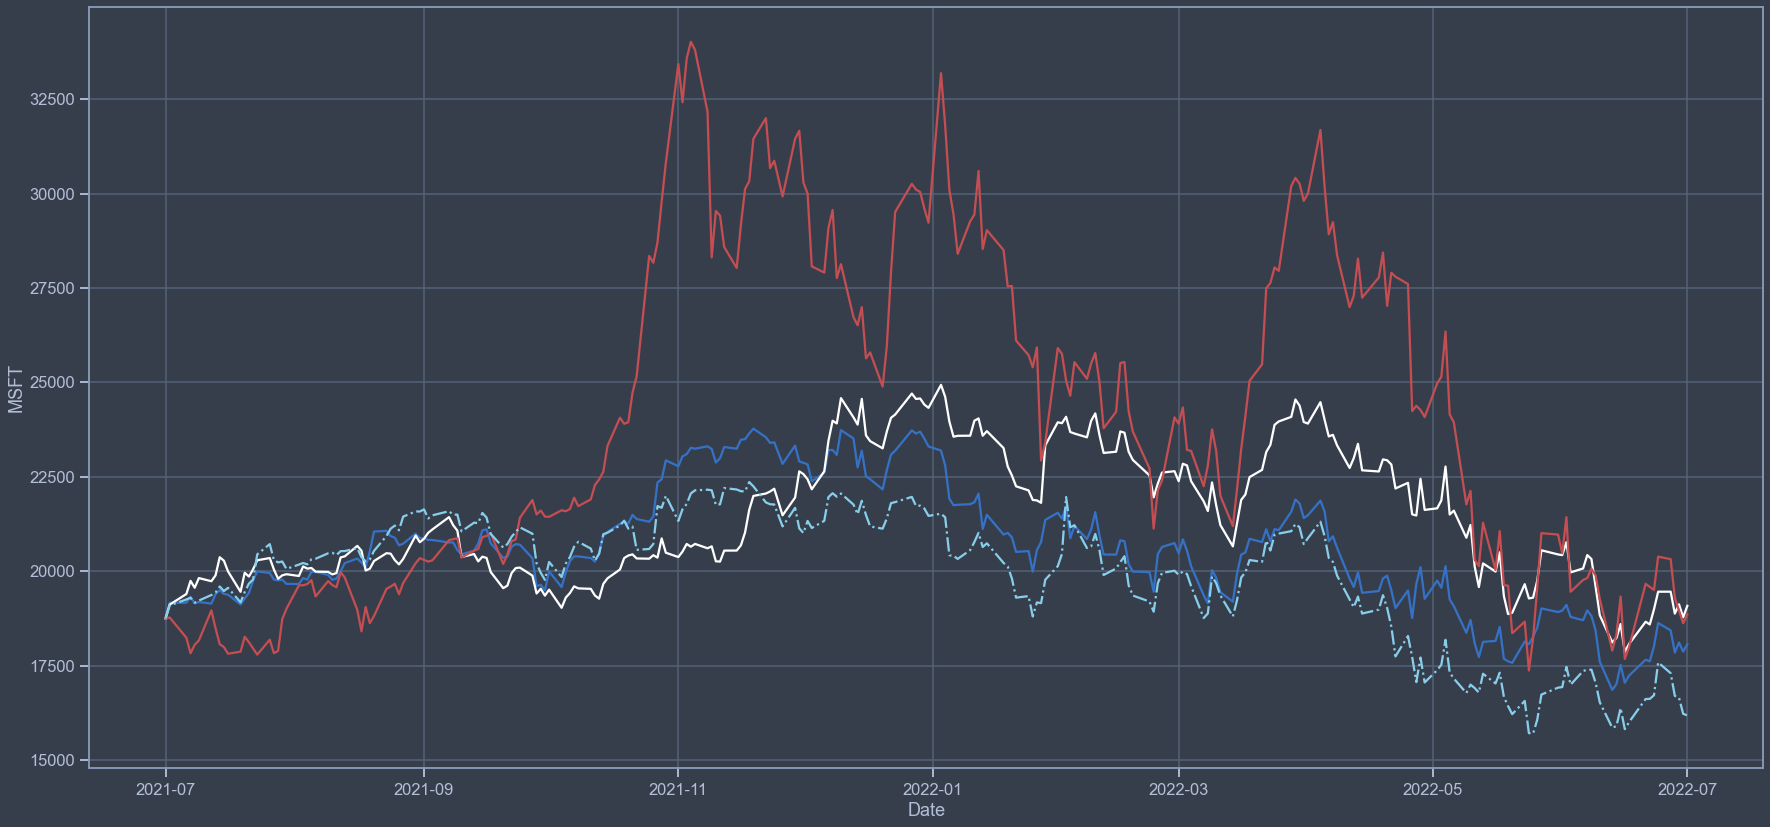

In [1508]:
# Individual performance comparison between GOOG and our model's favored stocks
fig, ax = plt.subplots(figsize=(30,14))
sns.set_context('talk')

sns.lineplot(data=st_position_values['MSFT'], color='b', dashes=False);
sns.lineplot(data=st_position_values['AAPL'], color='w', dashes=False);
sns.lineplot(data=st_position_values['TSLA'], color='r', dashes=False);
sns.lineplot(data=st_position_values['GOOG'], color='skyblue', dashes=True, linestyle='-.', markers=True);

#sns.lineplot(data=st_optimal_position_values['MSFT'], color='b', dashes=False);
#sns.lineplot(data=st_optimal_position_values['AAPL'], color='w', dashes=False);
#sns.lineplot(data=st_optimal_position_values['TSLA'], color='r', dashes=False);

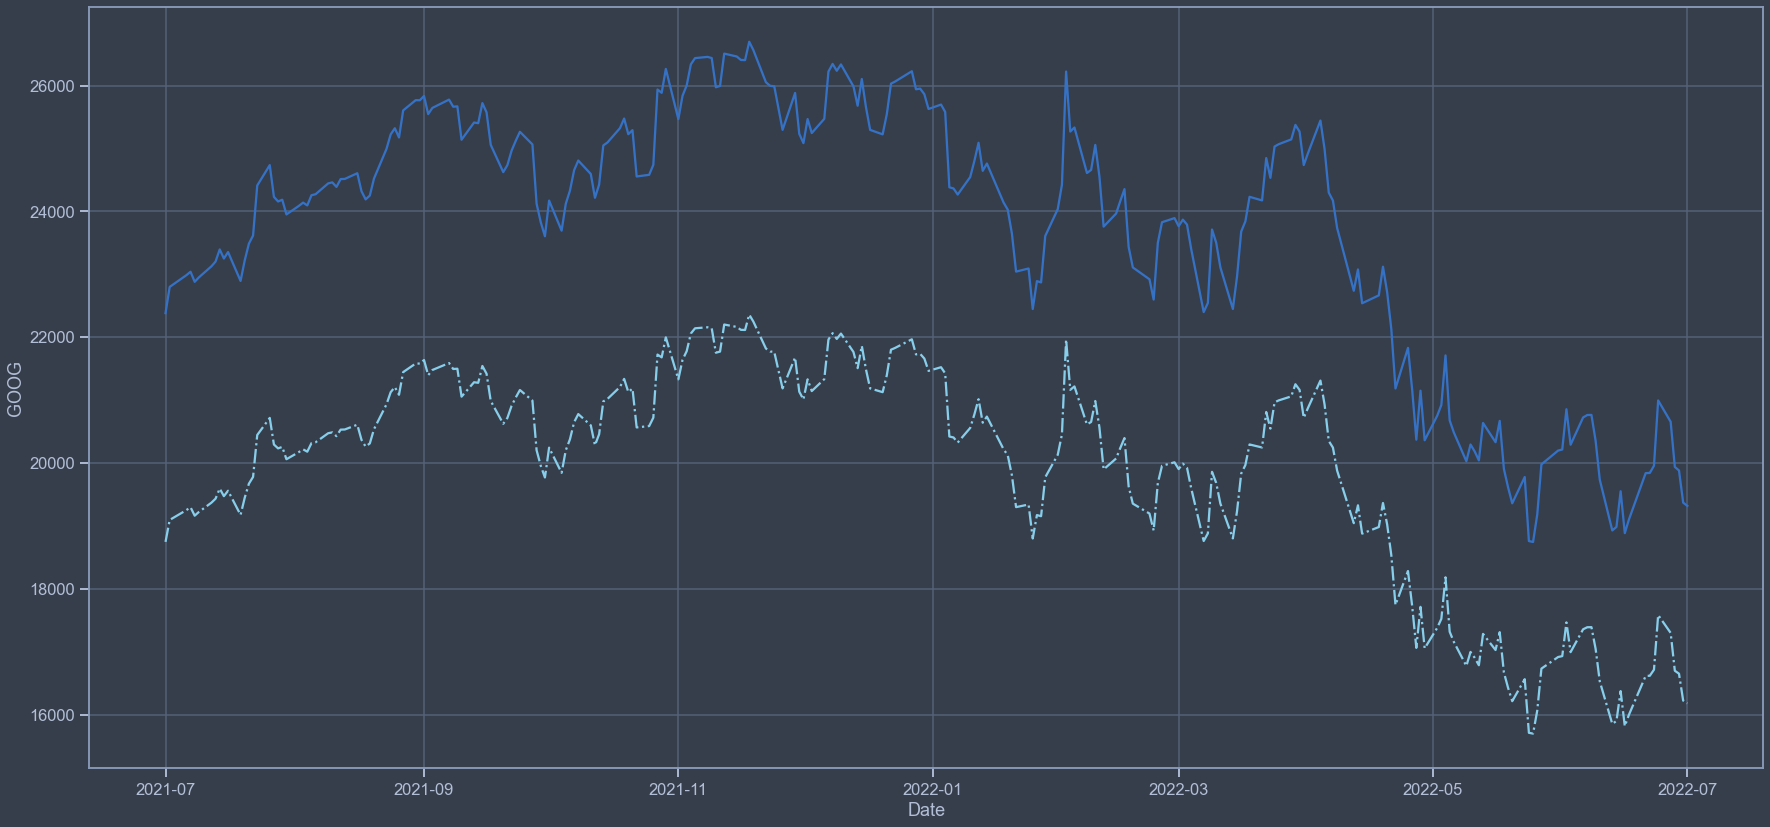

In [1509]:
# Optimzed vs standard performance comparison for GOOG
fig, ax = plt.subplots(figsize=(30,14))
sns.set_context('talk')

sns.lineplot(data=st_optimal_position_values['GOOG'], color='b', dashes=False)
sns.lineplot(data=st_position_values['GOOG'], color='skyblue', dashes=True, linestyle='-.', markers=True);

Our model has decided that we should increase our capital allocation in GOOG by only 2.42% due to the fact that it would yield a stable return for over 80% of our investment period while decreasing our potential losses since it does not crash nearly as hard as our model's unfavored stocks. Granted, it does not generate a return nearly as high as our model's favored stocks since our model has selected GOOG as a hedge to prioritize downside prevention instead of maximizing returns.

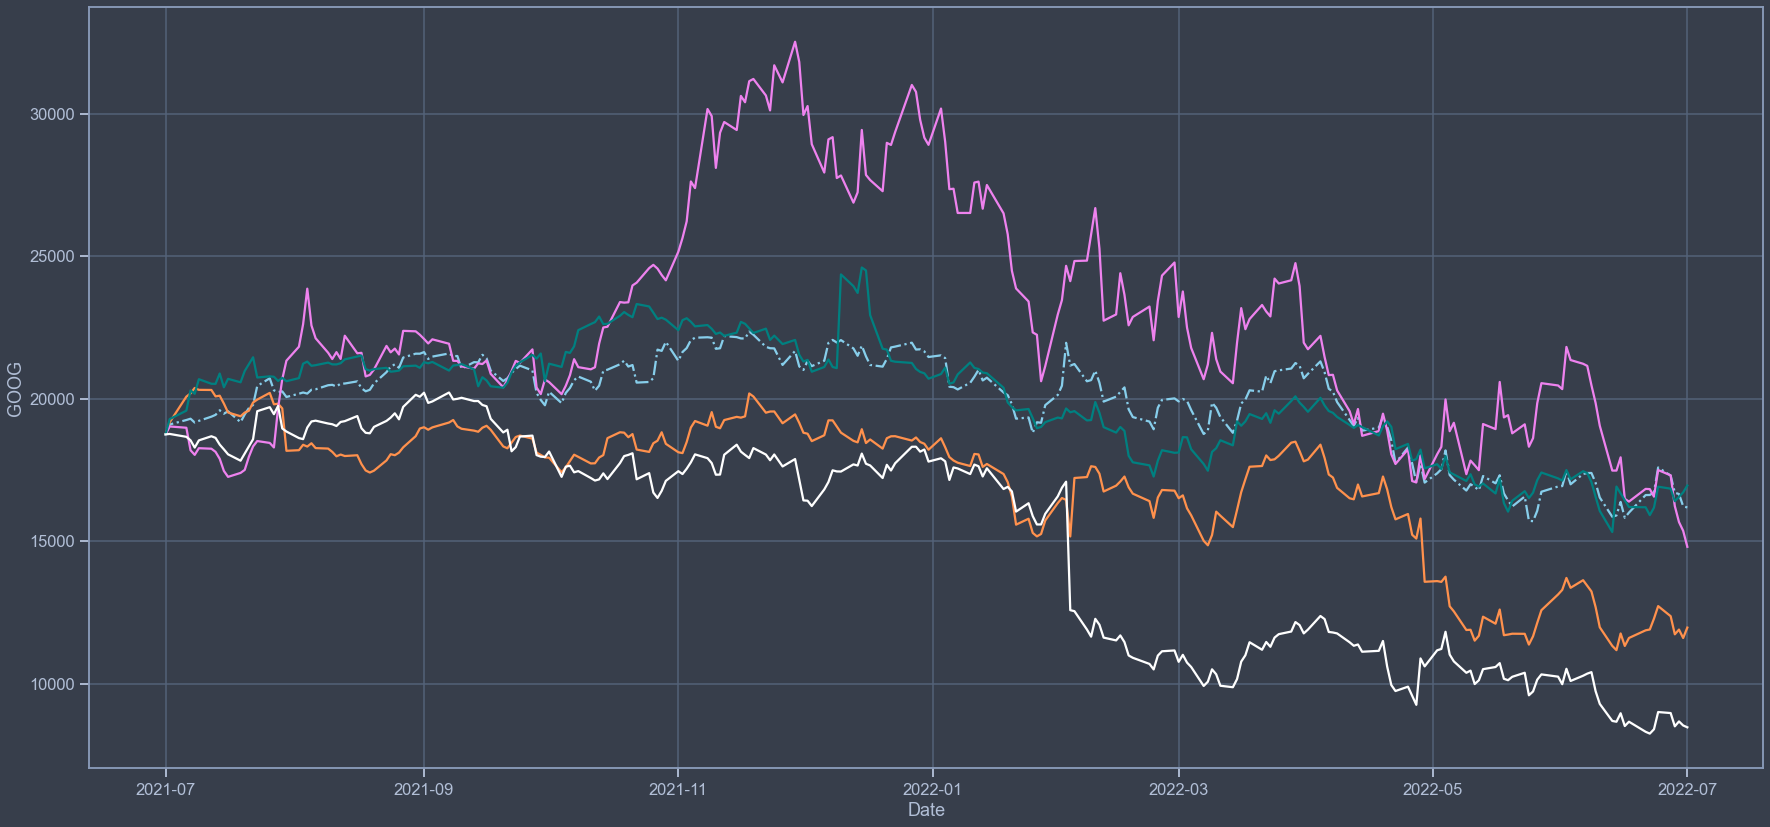

In [1510]:
# Individual performance comparison between GOOG and our model's unfavored stocks
fig, ax = plt.subplots(figsize=(30,14))
sns.set_context('talk')

sns.lineplot(data=st_position_values['GOOG'], color='skyblue', dashes=True, linestyle='-.', markers=True);
sns.lineplot(data=st_position_values['AMZN'], color='y', dashes=False);
sns.lineplot(data=st_position_values['AMD'], color='violet', dashes=False);
sns.lineplot(data=st_position_values['ORCL'], color='teal', dashes=False);
sns.lineplot(data=st_position_values['META'], color='white', dashes=False);

## 3. Model's Unfavored Stocks (ORCL, AMD, META, AMZN)

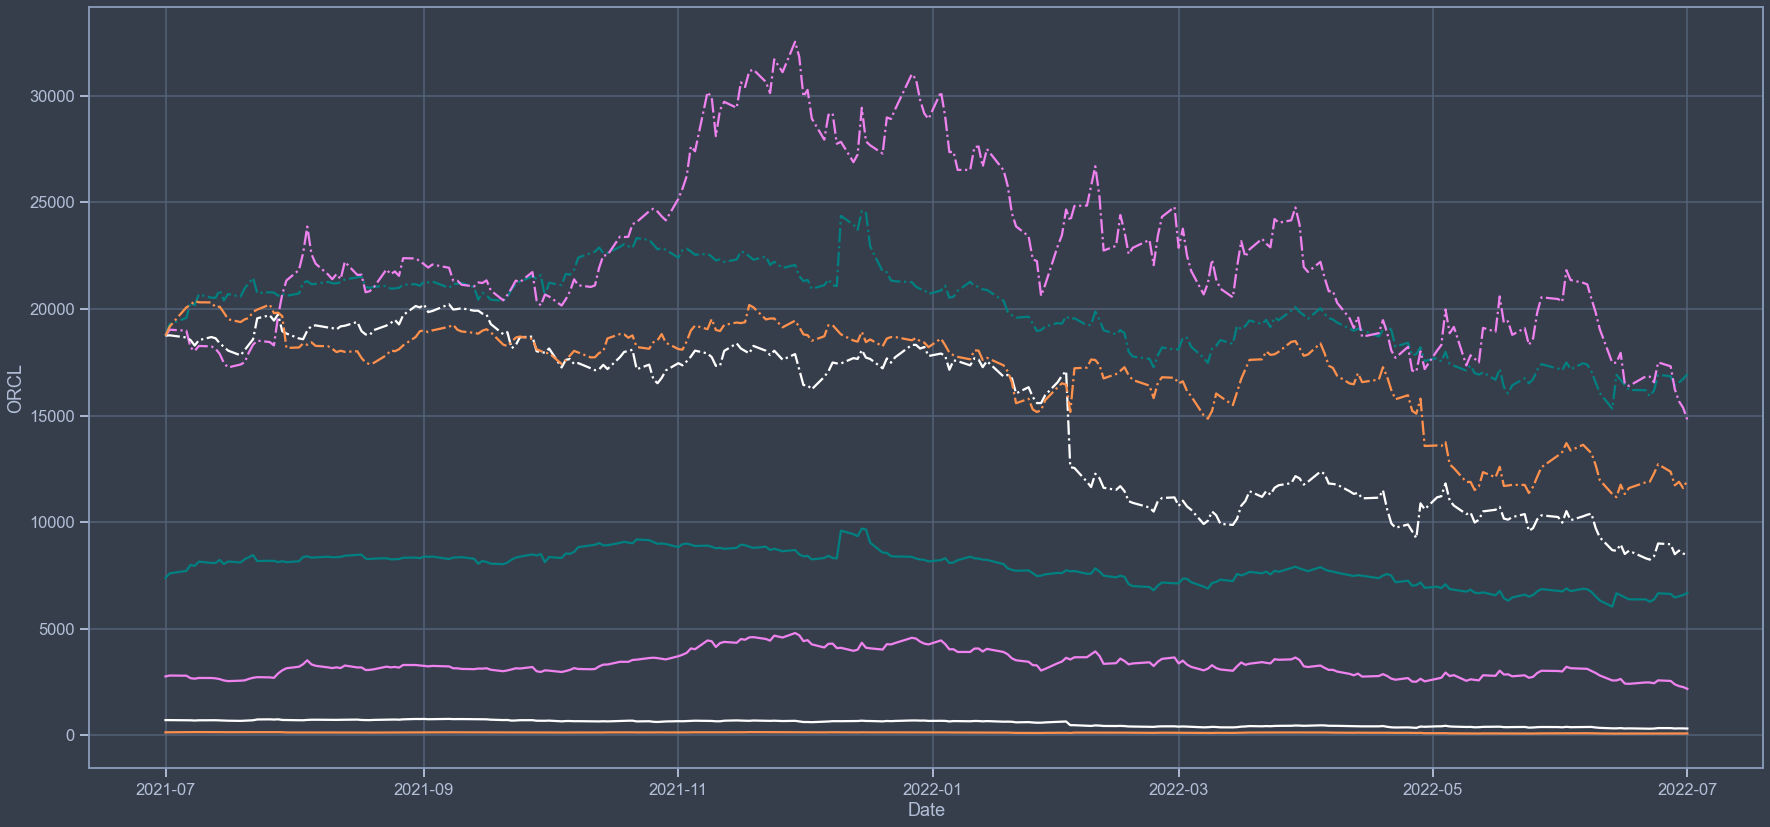

In [1511]:
# Optimzed vs standard performance comparison for our model's unfavored stocks
fig, ax = plt.subplots(figsize=(30,14))
sns.set_context('talk')

sns.lineplot(data=st_position_values['ORCL'], color='teal', dashes=True, linestyle='-.', markers=True);
sns.lineplot(data=st_position_values['AMD'], color='violet', dashes=True, linestyle='-.', markers=True);
sns.lineplot(data=st_position_values['META'], color='white', dashes=True, linestyle='-.', markers=True);
sns.lineplot(data=st_position_values['AMZN'], color='y', dashes=True, linestyle='-.', markers=True);

sns.lineplot(data=st_optimal_position_values['ORCL'], color='teal', dashes=False);
sns.lineplot(data=st_optimal_position_values['AMD'], color='violet', dashes=False);
sns.lineplot(data=st_optimal_position_values['META'], color='white', dashes=False);
sns.lineplot(data=st_optimal_position_values['AMZN'], color='y', dashes=False);

We can see that our portfolio optimization model does not favor stocks that tend to (a) reduce our final position value or (b) barely manage to yield a slight profit then crash heavily (AMZN, META). Even though AMD did tend to yield a nice return, our model has discovered that investing in TSLA would have yielded notably larger returns with less downside risk (see chart below).

ORCL was also yielding a nice return for approximately 45% of our investment period then hit a downward trend for the remaining 55% of our investment period, which is why our model has decided to allocate only 4.93% of our capital towards ORCL (which is still substantially larger than our model's allocations of 1.85% towards AMD, 0.48% towards META, and 0.01% towards AMZN)

Our model has directly chosen our optimal allocation amounts for our unfavored stocks based on the order that would prevent the most downside risk.

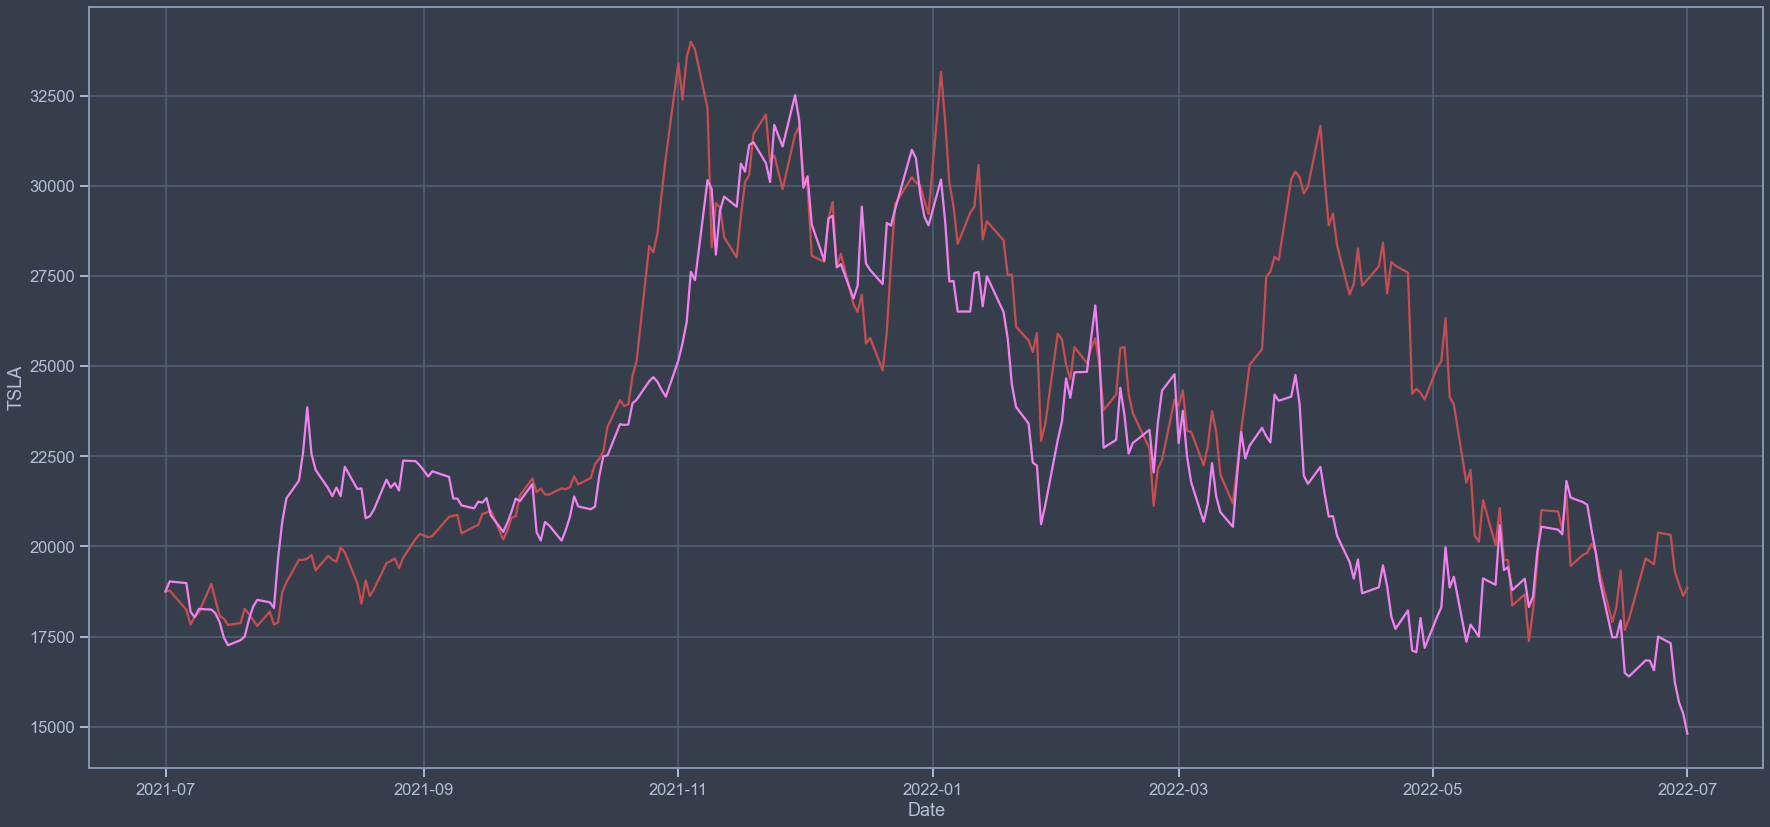

In [1512]:
# Individual performance comparison for AMD and TSLA
fig, ax = plt.subplots(figsize=(30,14))
sns.set_context('talk')

sns.lineplot(data=st_position_values['TSLA'], color='r', dashes=False);
sns.lineplot(data=st_position_values['AMD'], color='violet', dashes=False);

## 1. Model's Favored Cryptos (MANA, ETH)

**Complete Analysis Coming Soon**

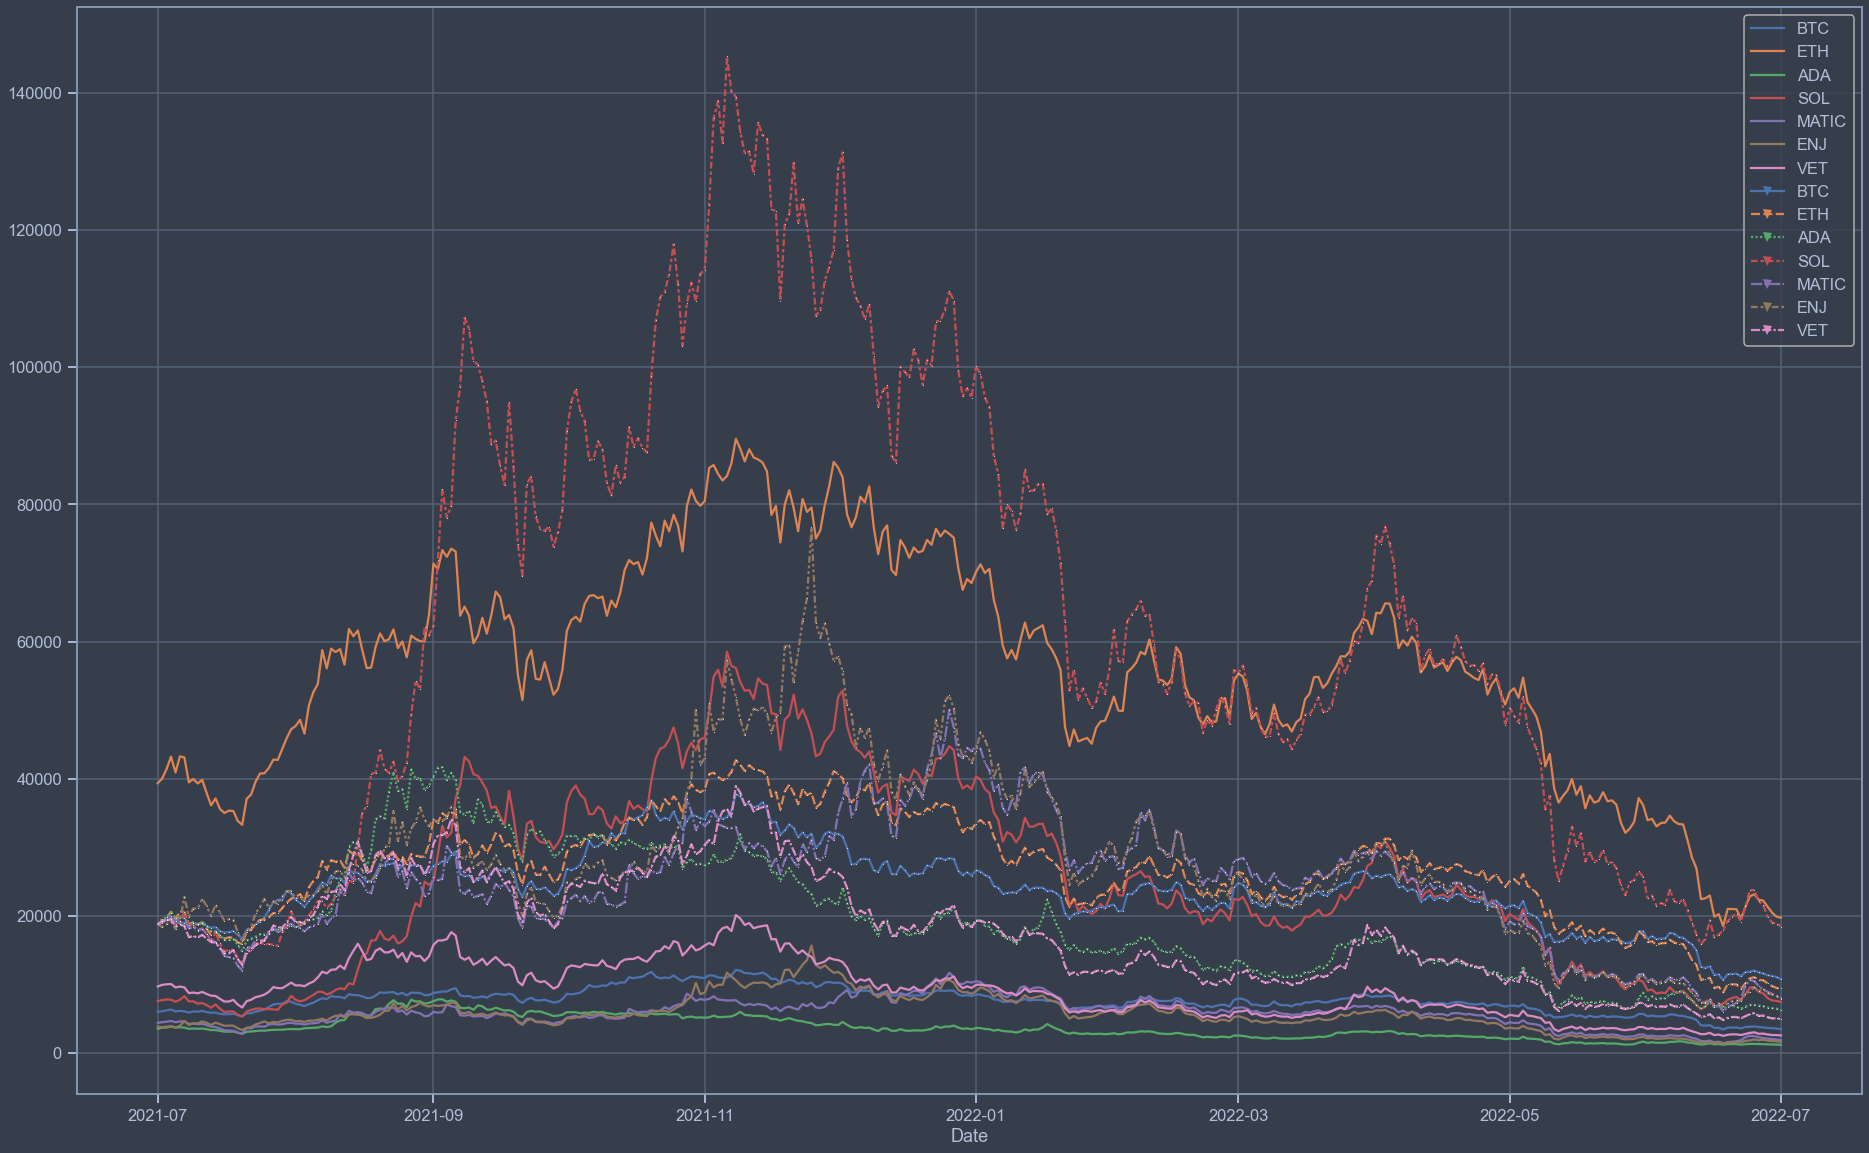

In [1513]:
# Plotting our optimized crypto portfolio compared to our standard crypto portfolio
fig, ax = plt.subplots(figsize=(32,20))

# Adding markers to cryptos in our standard crypto portfolio for ease of comparison
sns.lineplot(data=cr_indv_optimal_position_values.drop('MANA', axis=1), palette='deep', dashes=False);
sns.lineplot(data=cr_indv_position_values.drop('MANA', axis=1), palette='deep', linestyle ='-.', markers=['v','v','v','v','v','v','v'], markersize=0.3);

# TODO Edit list of lineplot markers to fluctuate with length of values (['v']*cr_position_values.columns.nunique())

In [1514]:
# TODO Define function with zip for loop to append all differences in position allocations with output of show_optimal_distr function
diff_in_pos_allos = """

# Visual display of asset head and tail
display(cr_portfolio_list[4].head(1),cr_portfolio_list[4].tail(1))

# NOTE: MANA = cr_portfolio_list[5]
# Calculation of difference between optimal and standard asset allocations
print(
    '\nAsset Optimal Allocation (full) = {:,.4f}%'.
    format(cr_portfolio_list[4]['Optimal Allocation'][0]*100),
    '\nAsset Standard Allocation (full) = {:,.4f}%'.
    format(cr_portfolio_list[4]['Allocation'][0]*100),
    '\nDifference in Asset Optimal Allocation Compared to Standard = {:+,.2f}%'.
    format(cr_portfolio_list[4]['Optimal Allocation'][0]*100 - (cr_portfolio_list[4]['Allocation'][0]*100))
)
"""

In [1515]:
show_optimal_distr('cr')

Optimal Distributions per Crypto (Sorted by Weight):


Crypto  Weight
5   MANA  0.5048
1    ETH  0.2622
7    VET  0.0645
3    SOL  0.0503
0    BTC  0.0401
4  MATIC  0.0291
6    ENJ  0.0255
2    ADA  0.0234

As for the crypto portfolio, our model has discovered that MANA would have yielded the most return and would have led to an overall higher current portfolio value.

## 2. Model's "Somewhat Ideal" Risk/Reward Cryptos (VET, SOL)

**Complete Analysis Coming Soon**

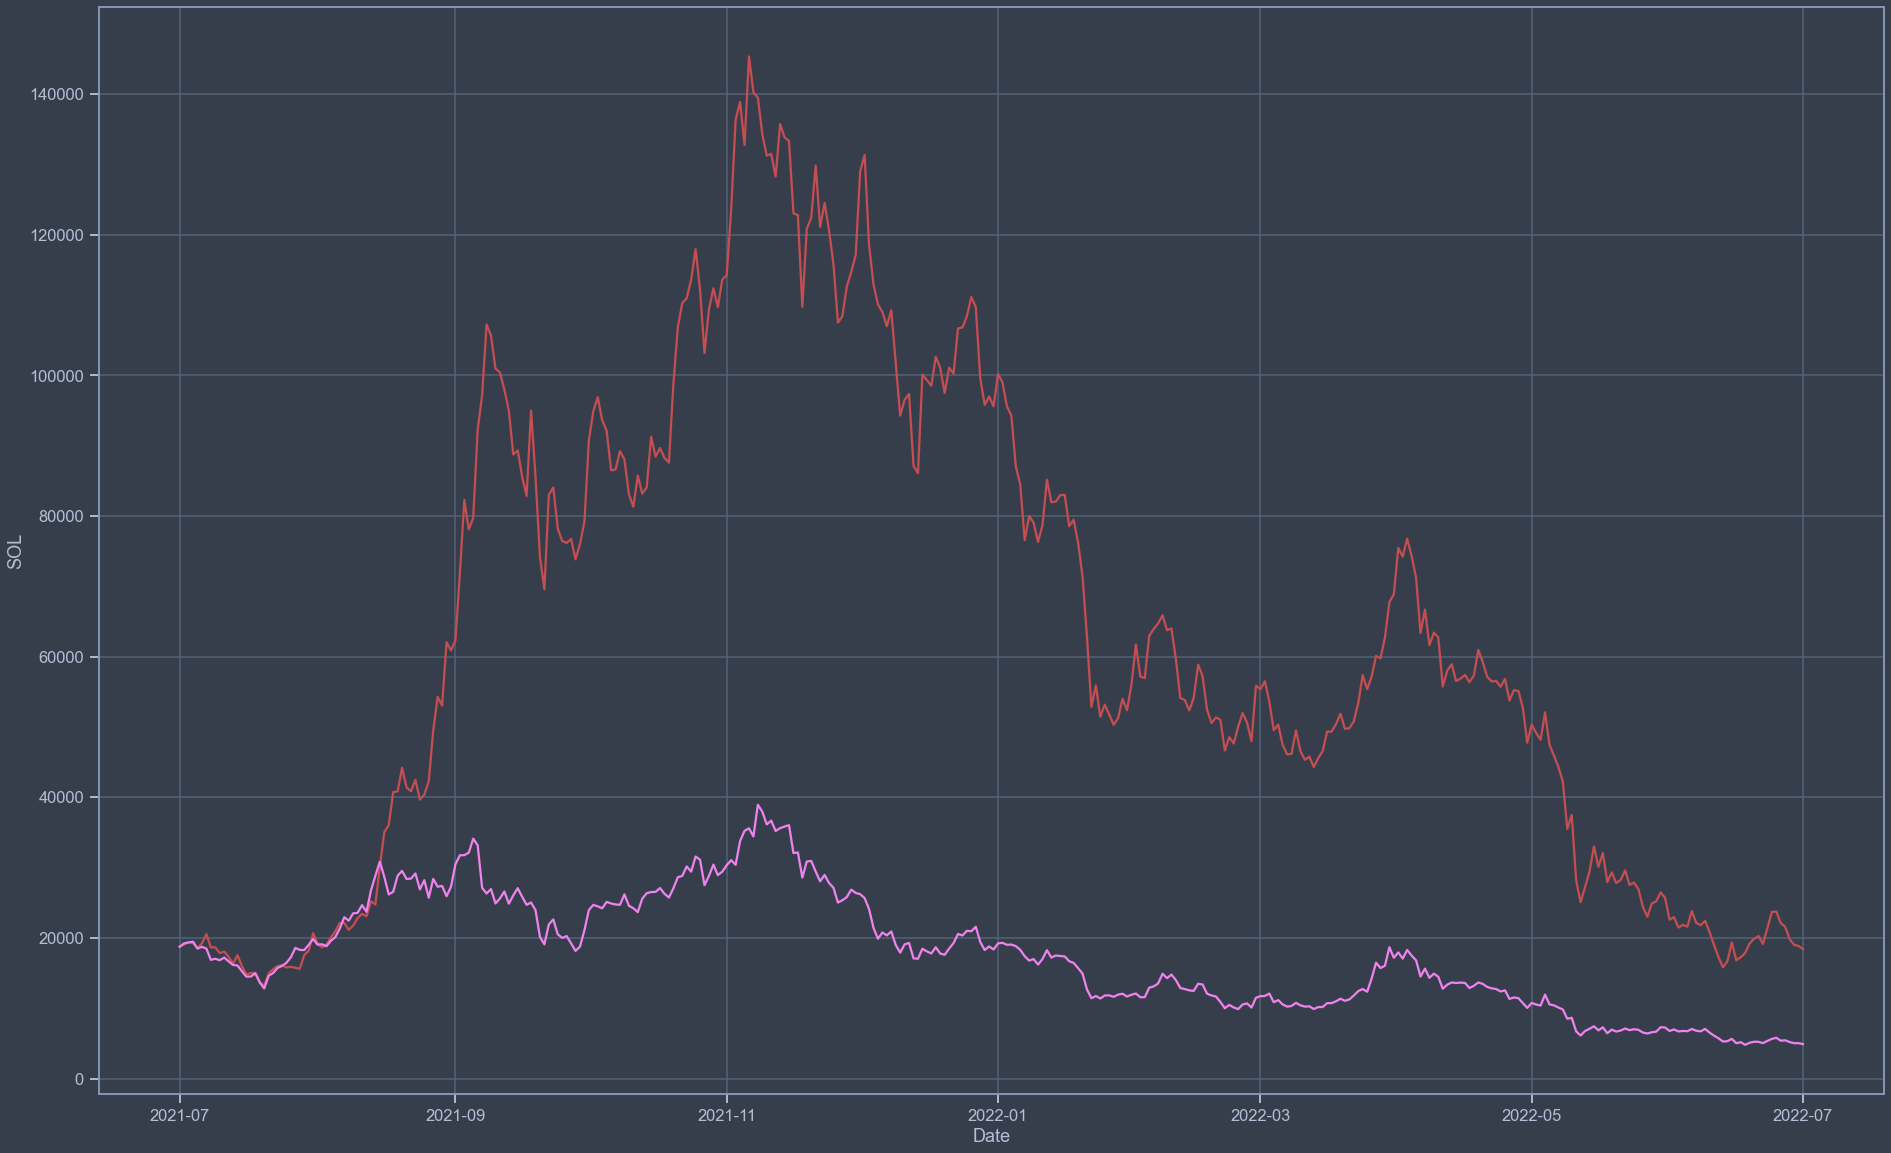

In [1516]:
# Optimzed vs standard performance comparison for our model's somewhat safe cryptos
fig, ax = plt.subplots(figsize=(32,20))

# Adding markers to cryptos in our standard crypto portfolio for ease of comparison
sns.lineplot(data=cr_indv_position_values['SOL'], color='r');#, linestyle ='-.', markers=['v','v','v','v','v','v','v'], markersize=0.3);
sns.lineplot(data=cr_indv_position_values['VET'], color='violet');#, linestyle ='-.', markers=['v','v','v','v','v','v','v'], markersize=0.3);
#sns.lineplot(data=cr_indv_optimal_position_values['SOL'], color='r', dashes=False);
#sns.lineplot(data=cr_indv_optimal_position_values['VET'], color='violet', dashes=False);

# TODO Edit list of lineplot markers to fluctuate with length of values (['v']*cr_position_values.columns.nunique())

## 3. Model's Unfavored Cryptos (BTC, MATIC, ENJ, ADA)

**Complete Analysis Coming Soon**

-----
## 1. Model's Favored Index (SPY)

**Complete Analysis Coming Soon**

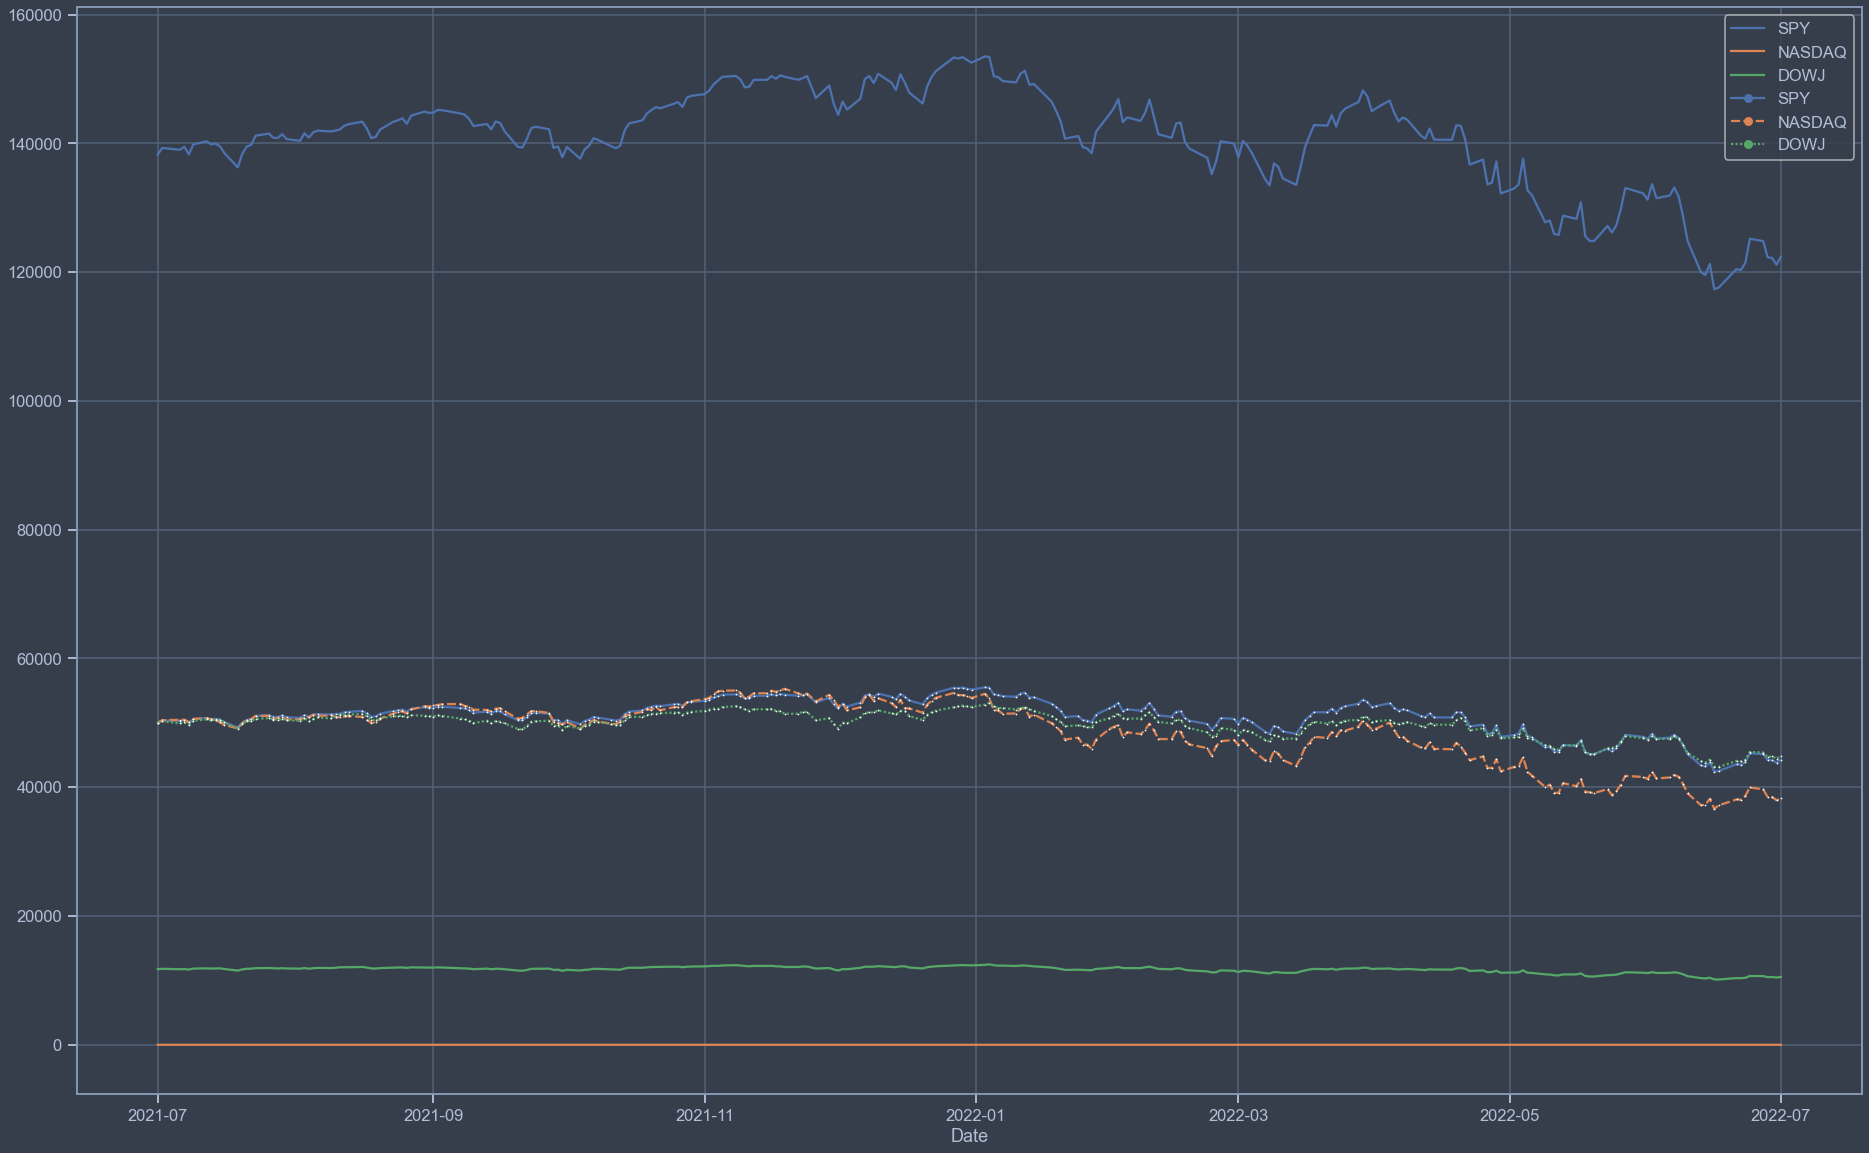

In [1517]:
# Plotting our optimized index portfolio compared to our standard index portfolio
fig, ax = plt.subplots(figsize=(32,20))

# Adding markers to indexes in our standard index portfolio for ease of comparison
sns.lineplot(data=ind_indv_optimal_position_values, palette="deep", dashes=False);
sns.lineplot(data=ind_indv_position_values, palette="deep", dashes=True, linestyle ='-.', markers=['o','o','o'], markersize=1);

In [1518]:
show_optimal_distr('ind')

Optimal Distributions per Index (Sorted by Weight):


Index  Weight
0     SPY  0.9216
2    DOWJ  0.0784
1  NASDAQ  0.0000

As we can see, when dealing with the index portfolio, our model heavily prefers to allocate capital towards the SPY index. Our model has also decided that it is better to avoid allocating any capital towards the DOWJ index altogether.

## 2. Model's Hedge Index (DOWJ)

**Complete Analysis Coming Soon**

## 3. Model's Unfavored Index (NASDAQ)

**Complete Analysis Coming Soon**

In [1519]:
# TODO Create new dataframes for varying date ranges
"""print(
        'Scatter Plot and Line Plot Comparisons for 4 Scenarios in Final Version:',
        '\n[1/4] Stocks vs Crypto vs Index During Market Surge',
        '\n[2/4] Stocks vs Crypto vs Index During Market Crash',
        '\n[3/4] Stocks vs Crypto vs Index During Covid Crash',
        '\n[4/4] Stocks vs Crypto vs Index During 2021 Q1-Q2 Crash'
)"""

"print(\n        'Scatter Plot and Line Plot Comparisons for 4 Scenarios in Final Version:',\n        '\n[1/4] Stocks vs Crypto vs Index During Market Surge',\n        '\n[2/4] Stocks vs Crypto vs Index During Market Crash',\n        '\n[3/4] Stocks vs Crypto vs Index During Covid Crash',\n        '\n[4/4] Stocks vs Crypto vs Index During 2021 Q1-Q2 Crash'\n)"

# **VII) Conclusions**

## 1. Stock Portfolio

* Our optimized high was 3.75% higher than our standard high, which generated an opportunity for us to realize an additional profit of $7,167.44 at the highest high
* Our optimized low was 13.02% higher than our standard low, which allowed us to keep an additional amount of $15,781.75 even at the lowest low
* Our optimized current value is 16.05% higher than our standard current value, which is allowing us to keep an additional amount of $19,966.85 that we otherwise would not have had at the present day

### Stock Crash Notes

* Our optimized market crash would be -27.29% ($-54,171.34) from our portfolio's optimized high of $198,524.70
* This is still 7.71% better than our standard market crash of -35.00% ($-66,970.75) from our portfolio's standard high of $191,357.27
* Although we would still lose a notable percentage of our unrealized gains, we would be losing a smaller percentage of an overall higher amount

## 2. Crypto Portfolio

* Our optimized high was 75.29% higher than our standard high, which generated an opportunity for us to realize an additional profit of $398,773.17 at the highest high
* Our optimized high was $928,433.30 (6.19x our initial investment), as opposed to our standard high which was $529,660.13 (3.53x our initial investment)
* Our optimized low was 62.22% higher than our standard low, which allowed us to keep an additional amount of $54,590.13 even at the lowest low
* Our optimized current value is 63.34% higher than our standard current value, which is allowing us to keep an additional amount of $61,622.57 that we otherwise would not have had at the present day

### Crypto Crash Notes

* Our optimized market crash would be -82.88% ($-769,527.16) from our portfolio's optimized high of $928,433.30
* This is just 1.25% less than our standard market crash of -81.63% ($-432,376.56) from our portfolio's standard high of $191,357.27
* Although we would still lose approximately 80% of our unrealized gains, we would be risking an additional 1.25% loss in order to potentially gain an additional 2.65x return of our initial investment
* ***NOTE:*** Even though our optimized market crash is only 1.25% greater than our standard market crash, the difference in dollar amounts is substantial due to the fact that our optimized high is 6.19x our initial investment vs our standard high which is 3.53x our initial investment

## 3. Index Portfolio

* Our optimized high was 1.88% higher than our standard high, which generated an opportunity for us to realize an additional profit of $3,069.36 at the highest high
* Our optimized low was 4.25% higher than our standard low, which allowed us to keep an additional amount of $5,199.90 even at the lowest low
* Our optimized current value is 4.30% higher than our standard current value, which is allowing us to keep an additional amount of $5,487.99 that we otherwise would not have had at the present day

### Index Crash Notes

* Our optimized market crash would be -19.86% ($-32,944.24) from our portfolio's optimized high of $165,915.00
* This is still 1.86% better than our standard market crash of -21.72% ($-35,362.88) from our portfolio's standard high of $162,845.63
* Although we would still lose approximately 20% of our unrealized gains, we would be securing a higher low by 4.25% while potentially gaining an additional 1.88% at the optimized high
* We would also be losing a smaller percentage of a higher amount


# **VIII) TO-DOs (Future Updates)**

In [1520]:
# TODO Create table of contents
# TODO Define function to pull data (ideally from numerous datasources)
# TODO Correct date_range variable reassignment
# TODO Create two functions to measure bounds-based performance given (1) specific assets and (2) specific portfolios
# TODO Edit conversions of dt.strp datetimes to pandas.tslibs datetimes for cleaner outputs
# TODO Add comparison of risk vs reward ratios between portfolios
# TODO Edit legend to showcase which portfolio belongs to which color
# TODO Edit list of lineplot markers to fluctuate with length of values (['v']*cr_position_values.columns.nunique())
# TODO Define function with zip for loop to append all differences in position allocations with output of show_optimal_distr function
# TODO Create new dataframes for varying date ranges

_Table of contents draft in this cell_
<!--Cell to store draft for table of contents
**Table of Contents Coming Soon**
### **I) Header 1**
* [A) Subheader 1](#A)
* [B) Subheader 2](#B)
* [C) Subheader 3](#C)
* [D) Subheader 4](#D)
* [E) Subheader 5](#E)
### **II) Header 2**
* [A) Subheader 1](#A)
* [B) Subheader 2](#B)
### **I) Header 3**
* [A) Subheader 1](#A)
* [B) Subheader 2](#B)
### **IV) Header 4**
* [A) Subheader 1](#A)
* [B) Subheader 2](#B)
* [C) Subheader 3](#C)
### **V) Header 5**
* [A) Subheader 1](#A)
* [B) Subheader 2](#B)
* [C) Subheader 3](#C)
### **VI) Header 6**
* [A) Subheader 1](#A)
* [B) Subheader 2](#B)
* [C) Subheader 3](#C)
-->

In [1521]:
""" # TODO Define function to pull data (ideally from numerous datasources)
def pull_asset_data(portf_type, asset):
    if portf_type == 'st':
        pdr.DataReader(asset, 'yahoo', st_start_date, st_end_date)
    elif portf_type == 'cr':
        pdr.DataReader(asset, 'yahoo', cr_start_date, cr_end_date)
    elif portf_type == 'ind':
        pdr.DataReader(asset, 'yahoo', ind_start_date, ind_end_date)
"""

" # TODO Define function to pull data (ideally from numerous datasources)\ndef pull_asset_data(portf_type, asset):\n    if portf_type == 'st':\n        pdr.DataReader(asset, 'yahoo', st_start_date, st_end_date)\n    elif portf_type == 'cr':\n        pdr.DataReader(asset, 'yahoo', cr_start_date, cr_end_date)\n    elif portf_type == 'ind':\n        pdr.DataReader(asset, 'yahoo', ind_start_date, ind_end_date)\n"